# Step 1. Importing the necessary libraries I will use for this project

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
file_path = r"C:\Users\ASUS\Desktop\Study 1\Study_data_final_1.xlsx"

In [3]:
df = pd.read_excel(file_path)

In [4]:
df.head(10)

,Country,Year,Real interest rate (%),Trade (% of GDP),"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)","Foreign direct investment, net inflows (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),"Inflation, GDP deflator (annual %)",Population ages 15-64 (% of total population)
0,Argentina,1990 [YR1990],..,14.990859,..,..,1.298879,..,-2.467214,2078.316818,60.951083
1,Argentina,1991 [YR1991],..,13.753054,70.516137,..,1.285579,5.44,9.133111,140.502379,61.009447
2,Argentina,1992 [YR1992],..,14.730981,70.36948,..,1.936795,6.36,7.937292,16.071994,61.087234
3,Argentina,1993 [YR1993],..,16.223151,70.154138,..,1.179803,10.1,8.206979,-3.561096,61.190239
4,Argentina,1994 [YR1994],..,18.134346,70.265617,..,1.411953,11.76,5.836201,2.84934,61.301786
5,Argentina,1995 [YR1995],..,19.771423,70.644117,..,2.173928,18.8,-2.84521,3.165123,61.425356
6,Argentina,1996 [YR1996],..,21.506468,70.781494,..,2.553203,17.11,5.52669,-0.052375,61.566290
7,Argentina,1997 [YR1997],..,23.336179,71.731006,..,3.127878,14.82,8.111047,-0.463913,61.716040
8,Argentina,1998 [YR1998],..,23.350028,72.138971,..,2.438769,12.65,3.850179,-1.70528,61.871353
9,Argentina,1999 [YR1999],..,21.382745,72.435163,..,8.460582,14.05,-3.385457,-1.836558,62.025624


# Step 2 Explore data with EDA

## Gather basic information about the data

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Country                                                                                             748 non-null    object 
 1   Year                                                                                                748 non-null    object 
 2   Real interest rate (%)                                                                              748 non-null    object 
 3   Trade (% of GDP)                                                                                    748 non-null    object 
 4   Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                     748 non-null    

## Convert columns to numeric

In [6]:
columns_to_convert = ['Wage and salaried workers, total (% of total employment) (modeled ILO estimate)', 'Trade (% of GDP)', 'GDP growth (annual %)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Real interest rate (%)', 'Foreign direct investment, net inflows (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Country                                                                                             748 non-null    object 
 1   Year                                                                                                748 non-null    object 
 2   Real interest rate (%)                                                                              678 non-null    float64
 3   Trade (% of GDP)                                                                                    688 non-null    float64
 4   Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                     726 non-null    

## Extract the dat for the year column

In [8]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Country                                                                                             748 non-null    object 
 1   Year                                                                                                748 non-null    int64  
 2   Real interest rate (%)                                                                              678 non-null    float64
 3   Trade (% of GDP)                                                                                    688 non-null    float64
 4   Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                     726 non-null    

## Display amount of empty cells in the columns

In [10]:
print(df.isnull().sum())

Country                                                                                                 0
Year                                                                                                    0
Real interest rate (%)                                                                                 70
Trade (% of GDP)                                                                                       60
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                        22
Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)    406
Foreign direct investment, net inflows (% of GDP)                                                      28
Unemployment, total (% of total labor force) (modeled ILO estimate)                                    22
GDP growth (annual %)                                                                                   9
Inflation, GDP deflator (annual %)            

In [11]:
df.head(10)

,Country,Year,Real interest rate (%),Trade (% of GDP),"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)","Foreign direct investment, net inflows (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),"Inflation, GDP deflator (annual %)",Population ages 15-64 (% of total population)
0,Argentina,1990,NaN,14.990859,NaN,NaN,1.298879,NaN,-2.467214,2078.316818,60.951083
1,Argentina,1991,NaN,13.753054,70.516137,NaN,1.285579,5.44,9.133111,140.502379,61.009447
2,Argentina,1992,NaN,14.730981,70.369480,NaN,1.936795,6.36,7.937292,16.071994,61.087234
3,Argentina,1993,NaN,16.223151,70.154138,NaN,1.179803,10.10,8.206979,-3.561096,61.190239
4,Argentina,1994,NaN,18.134346,70.265617,NaN,1.411953,11.76,5.836201,2.849340,61.301786
5,Argentina,1995,NaN,19.771423,70.644117,NaN,2.173928,18.80,-2.845210,3.165123,61.425356
6,Argentina,1996,NaN,21.506468,70.781494,NaN,2.553203,17.11,5.526690,-0.052375,61.566290
7,Argentina,1997,NaN,23.336179,71.731006,NaN,3.127878,14.82,8.111047,-0.463913,61.716040
8,Argentina,1998,NaN,23.350028,72.138971,NaN,2.438769,12.65,3.850179,-1.705280,61.871353
9,Argentina,1999,NaN,21.382745,72.435163,NaN,8.460582,14.05,-3.385457,-1.836558,62.025624


## Set Country and year as index 

In [12]:
df = df.set_index(['Country', 'Year'])

In [13]:
print(df.index)

MultiIndex([(    'Argentina', 1990),
            (    'Argentina', 1991),
            (    'Argentina', 1992),
            (    'Argentina', 1993),
            (    'Argentina', 1994),
            (    'Argentina', 1995),
            (    'Argentina', 1996),
            (    'Argentina', 1997),
            (    'Argentina', 1998),
            (    'Argentina', 1999),
            ...
            ('Venezuela, RB', 2014),
            ('Venezuela, RB', 2015),
            ('Venezuela, RB', 2016),
            ('Venezuela, RB', 2017),
            ('Venezuela, RB', 2018),
            ('Venezuela, RB', 2019),
            ('Venezuela, RB', 2020),
            ('Venezuela, RB', 2021),
            ('Venezuela, RB', 2022),
            ('Venezuela, RB', 2023)],
           names=['Country', 'Year'], length=748)


In [14]:
df.columns

Index(['Real interest rate (%)', 'Trade (% of GDP)',
       'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'GDP growth (annual %)', 'Inflation, GDP deflator (annual %)',
       'Population ages 15-64 (% of total population)'],
      dtype='object')

## rename columns

In [15]:
df = df.rename(columns={'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)': 'Wages',
                        'Trade (% of GDP)': 'Trade',
                        'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment',
                        'Foreign direct investment, net inflows (% of GDP)': 'FDI',
                        'Inflation, GDP deflator (annual %)': 'Inflation',
                        'GDP growth (annual %)': 'GDP',
                        'Population ages 15-64 (% of total population)': 'Population',
                        'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)': 'Education',
                        'Real interest rate (%)': 'Interest_rate'})

In [16]:
df.columns

Index(['Interest_rate', 'Trade', 'Wages', 'Education', 'FDI', 'Unemployment',
       'GDP', 'Inflation', 'Population'],
      dtype='object')

In [17]:
df.head(10)

Interest_rate      Trade      Wages  Education       FDI  \
Country   Year                                                             
Argentina 1990            NaN  14.990859        NaN        NaN  1.298879   
          1991            NaN  13.753054  70.516137        NaN  1.285579   
          1992            NaN  14.730981  70.369480        NaN  1.936795   
          1993            NaN  16.223151  70.154138        NaN  1.179803   
          1994            NaN  18.134346  70.265617        NaN  1.411953   
          1995            NaN  19.771423  70.644117        NaN  2.173928   
          1996            NaN  21.506468  70.781494        NaN  2.553203   
          1997            NaN  23.336179  71.731006        NaN  3.127878   
          1998            NaN  23.350028  72.138971        NaN  2.438769   
          1999            NaN  21.382745  72.435163        NaN  8.460582   

                Unemployment       GDP    Inflation  Population  
Country   Year                                                   
Argentina 1990           NaN -2.467214  2078.316818   60.951083  
          1991          5.44  9.133111   140.502379   61.009447  
          1992          6.36  7.937292    16.071994   61.087234  
          1993         10.10  8.206979    -3.561096   61.190239  
          1994         11.76  5.836201     2.849340   61.301786  
          1995         18.80 -2.845210     3.165123   61.425356  
          1996         17.11  5.526690    -0.052375   61.566290  
          1997         14.82  8.111047    -0.463913   61.716040  
          1998         12.65  3.850179    -1.705280   61.871353  
          1999         14.05 -3.385457    -1.836558   62.025624

In [18]:
# Get information about data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 748 entries, ('Argentina', np.int64(1990)) to ('Venezuela, RB', np.int64(2023))
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest_rate  678 non-null    float64
 1   Trade          688 non-null    float64
 2   Wages          726 non-null    float64
 3   Education      342 non-null    float64
 4   FDI            720 non-null    float64
 5   Unemployment   726 non-null    float64
 6   GDP            739 non-null    float64
 7   Inflation      739 non-null    float64
 8   Population     748 non-null    float64
dtypes: float64(9)
memory usage: 56.2+ KB
None
       Interest_rate       Trade       Wages   Education         FDI  \
count     678.000000  688.000000  726.000000  342.000000  720.000000   
mean        8.543021   69.164459   59.954086   37.823876    3.564441   
std        15.906613   36.656121   14.531988   13.649197    3.688833   
min       -97.69347

In [19]:
df.to_csv('cleaned_data_stage_1.csv', index=False)

In [20]:
print(df.isnull().sum())

Interest_rate     70
Trade             60
Wages             22
Education        406
FDI               28
Unemployment      22
GDP                9
Inflation          9
Population         0
dtype: int64


##  Get missing values per country

In [21]:
missing_education_by_country = df[df['Education'].isnull()].groupby('Country').size()
missing_education_by_country_sorted = missing_education_by_country.sort_values(ascending=False)
print(missing_education_by_country_sorted)

Country
Argentina             32
Guyana                32
Haiti                 31
Suriname              30
Bahamas, The          30
Nicaragua             28
Belize                25
Jamaica               22
Guatemala             18
Uruguay               17
Venezuela, RB         16
Honduras              16
Chile                 13
Costa Rica            12
Brazil                11
Bolivia               11
Mexico                11
Colombia              11
Paraguay              11
Dominican Republic    10
Peru                  10
Panama                 9
dtype: int64


In [22]:
# Create a copy of the original DataFrame 
df_copy = df.copy()
#Create the missing value flag BEFORE resetting the index 
df_copy['Education_missing'] = df_copy['Education'].isnull().astype(int)

# Reset the index to make 'Country Name' and 'Year' regular columns 
df_reset = df_copy.reset_index()

# Select only numeric columns for correlation 
df_numeric = df_reset.select_dtypes(include=np.number)

# Calculate and print the correlation matrix 
correlation_matrix = df_numeric.corr() 

print(correlation_matrix)

                       Year  Interest_rate     Trade     Wages  Education  \
Year               1.000000      -0.080378 -0.055832  0.059976   0.415705   
Interest_rate     -0.080378       1.000000 -0.152067 -0.142511  -0.087014   
Trade             -0.055832      -0.152067  1.000000  0.142061  -0.096235   
Wages              0.059976      -0.142511  0.142061  1.000000   0.210128   
Education          0.415705      -0.087014 -0.096235  0.210128   1.000000   
FDI                0.109477       0.035461  0.452310  0.134439   0.088441   
Unemployment      -0.010106      -0.059254 -0.097576  0.231917   0.155319   
GDP               -0.011678       0.075305  0.140657  0.015326  -0.105692   
Inflation         -0.167236      -0.362741 -0.083982 -0.003548  -0.159830   
Population         0.659442       0.021365 -0.104015  0.474622   0.684719   
Education_missing -0.505779      -0.070063  0.069547  0.062956        NaN   

                        FDI  Unemployment       GDP  Inflation  Population 

## Adress missing values by using combination of interpolation forward fill and back fill

In [23]:
df['Education'] = df.groupby(level='Country')['Education'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

In [24]:
print(df.isnull().sum())

Interest_rate    70
Trade            60
Wages            22
Education         0
FDI              28
Unemployment     22
GDP               9
Inflation         9
Population        0
dtype: int64


In [25]:
for col in ['Interest_rate', 'Trade', 'Wages', 'FDI', 'Unemployment']:
    df[col] = df.groupby(level='Country')[col].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

In [26]:
print(df.isnull().sum())

Interest_rate    0
Trade            0
Wages            0
Education        0
FDI              0
Unemployment     0
GDP              9
Inflation        9
Population       0
dtype: int64


In [27]:
for col in ['GDP', 'Inflation']:
    df[col] = df.groupby(level='Country')[col].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

In [28]:
print(df.isnull().sum())

Interest_rate    0
Trade            0
Wages            0
Education        0
FDI              0
Unemployment     0
GDP              0
Inflation        0
Population       0
dtype: int64


In [29]:
# Get information about data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 748 entries, ('Argentina', np.int64(1990)) to ('Venezuela, RB', np.int64(2023))
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest_rate  748 non-null    float64
 1   Trade          748 non-null    float64
 2   Wages          748 non-null    float64
 3   Education      748 non-null    float64
 4   FDI            748 non-null    float64
 5   Unemployment   748 non-null    float64
 6   GDP            748 non-null    float64
 7   Inflation      748 non-null    float64
 8   Population     748 non-null    float64
dtypes: float64(9)
memory usage: 56.2+ KB
None
       Interest_rate       Trade       Wages   Education         FDI  \
count     748.000000  748.000000  748.000000  748.000000  748.000000   
mean        7.995254   73.034640   59.918520   34.403597    3.467603   
std        17.009538   40.402510   14.549143   16.530666    3.654394   
min       -97.69347

## Check for duplicate rows

In [30]:
duplicate_rows = df[df.duplicated()]
# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Interest_rate, Trade, Wages, Education, FDI, Unemployment, GDP, Inflation, Population]
Index: []


In [31]:
# Create a copy of the original DataFrame 
df_copy = df.copy()

# Reset the index to make 'Country Name' and 'Year' regular columns 
df_reset = df_copy.reset_index()

## Plot shows the trends of two economic indicators - GDP Growth and Trade

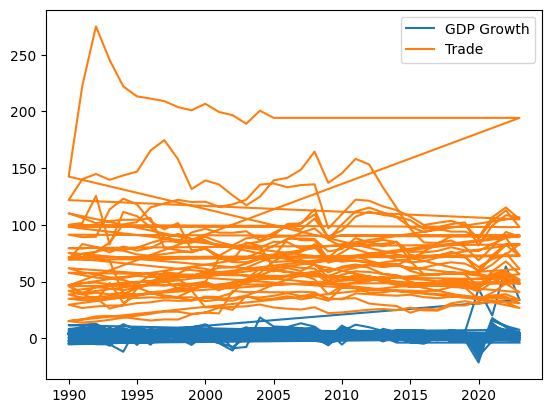

In [32]:
import matplotlib.pyplot as plt
plt.plot(df_reset['Year'], df_reset['GDP'], label="GDP Growth")
plt.plot(df_reset['Year'], df_reset['Trade'], label="Trade")
plt.legend()
plt.show()

## Plot shows the trends of two economic indicators - GDP Growth and unemployment

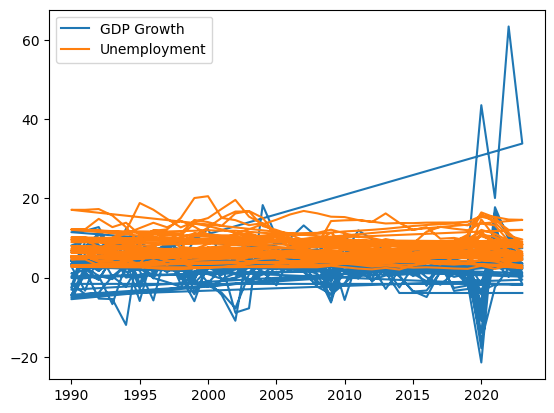

In [33]:
import matplotlib.pyplot as plt
plt.plot(df_reset['Year'], df_reset['GDP'], label="GDP Growth")
plt.plot(df_reset['Year'], df_reset['Unemployment'], label="Unemployment")
plt.legend()
plt.show()

In [34]:
import matplotlib.pyplot as plt

## plot shows GDP growth, trade and unemployment trends over time

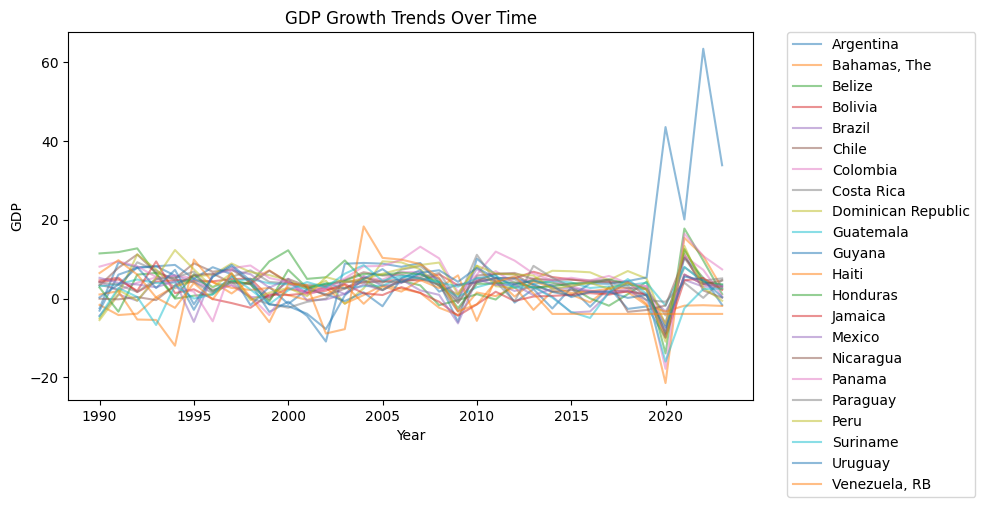

In [35]:
plt.figure(figsize=(10, 5))
for country in df_reset['Country'].unique():
    subset = df_reset[df_reset['Country'] == country]
    plt.plot(subset['Year'], subset['GDP'], label=country, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Growth Trends Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust bbox_to_anchor
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

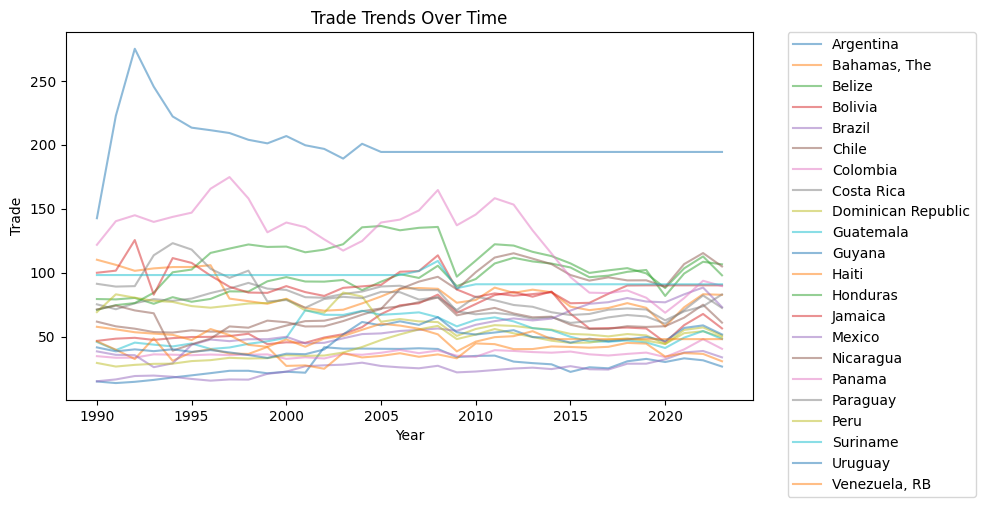

In [36]:
plt.figure(figsize=(10, 5))
for country in df_reset['Country'].unique():
    subset = df_reset[df_reset['Country'] == country]
    plt.plot(subset['Year'], subset['Trade'], label=country, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Trade")
plt.title("Trade Trends Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust bbox_to_anchor
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

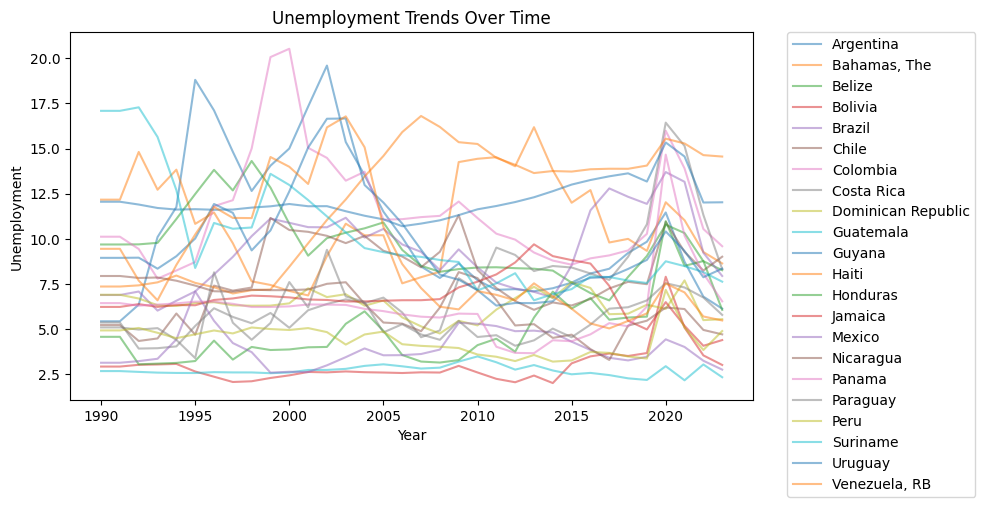

In [37]:
plt.figure(figsize=(10, 5))
for country in df_reset['Country'].unique():
    subset = df_reset[df_reset['Country'] == country]
    plt.plot(subset['Year'], subset['Unemployment'], label=country, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.title("Unemployment Trends Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust bbox_to_anchor
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Scatterplots GDP growth, trade and unemployment trends

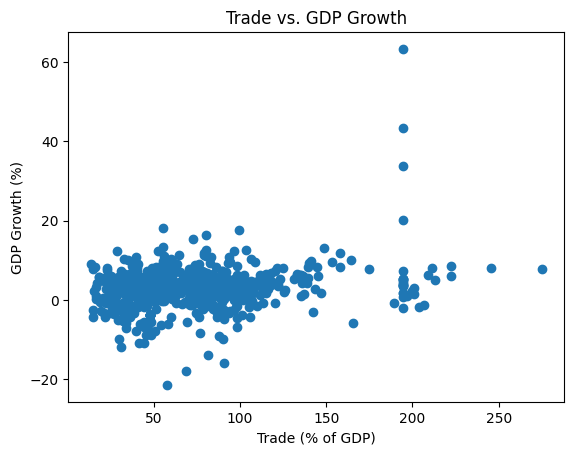

In [38]:
plt.scatter(df_reset['Trade'], df_reset['GDP'])
plt.xlabel("Trade (% of GDP)")
plt.ylabel("GDP Growth (%)")
plt.title("Trade vs. GDP Growth")
plt.show()

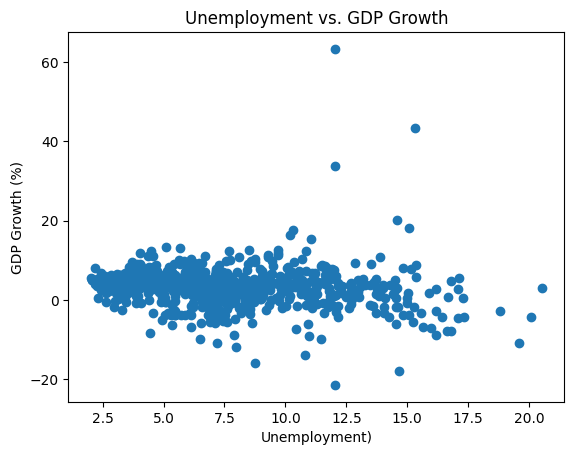

In [39]:
plt.scatter(df_reset['Unemployment'], df_reset['GDP'])
plt.xlabel("Unemployment)")
plt.ylabel("GDP Growth (%)")
plt.title("Unemployment vs. GDP Growth")
plt.show()

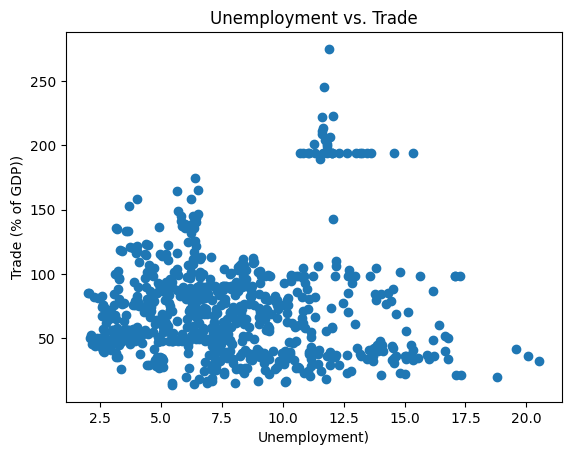

In [40]:
plt.scatter(df_reset['Unemployment'], df_reset['Trade'])
plt.xlabel("Unemployment)")
plt.ylabel("Trade (% of GDP))")
plt.title("Unemployment vs. Trade")
plt.show()

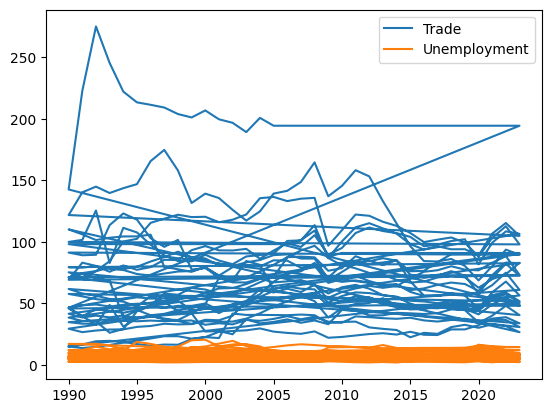

In [41]:
plt.plot(df_reset['Year'], df_reset['Trade'], label="Trade")
plt.plot(df_reset['Year'], df_reset['Unemployment'], label="Unemployment")
plt.legend()
plt.show()

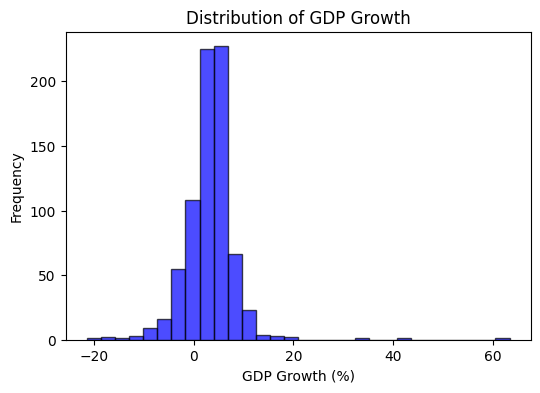

In [42]:
plt.figure(figsize=(6, 4))
plt.hist(df_reset['GDP'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("GDP Growth (%)")
plt.ylabel("Frequency")
plt.title("Distribution of GDP Growth")
plt.show()

## BoxPlots GDP growth distribution by country 

In [43]:
import seaborn as sns

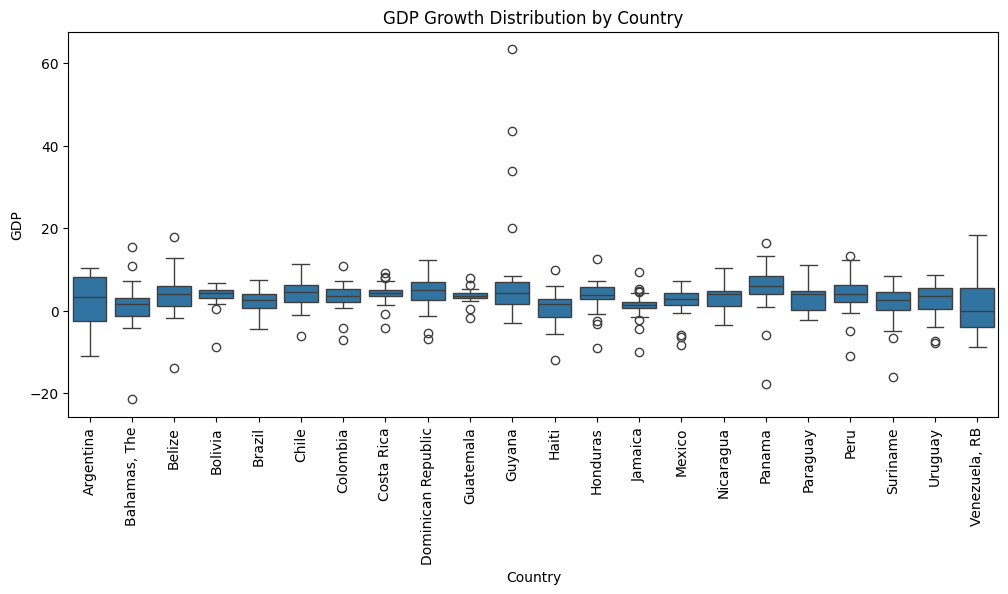

In [44]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Country", y="GDP", data=df_reset)
plt.xticks(rotation=90)
plt.title("GDP Growth Distribution by Country")
plt.show()

## Plotting of Histograms, QQ plots and scatterplots per variable

Checking GDP:


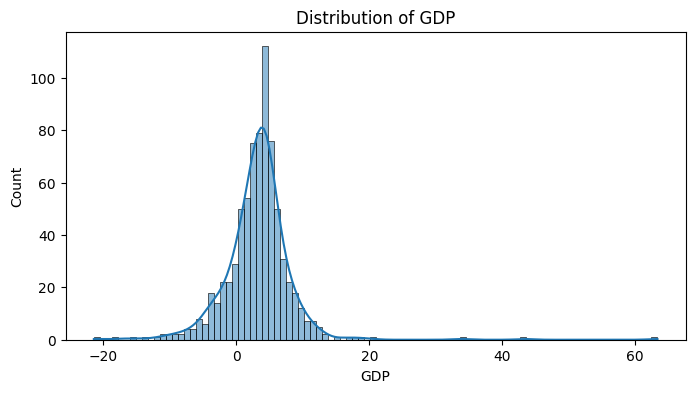

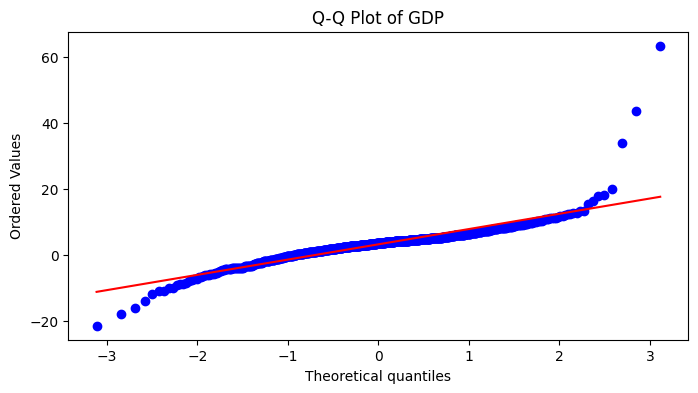

Skewness: 2.5224
------------------------------
Checking Trade:


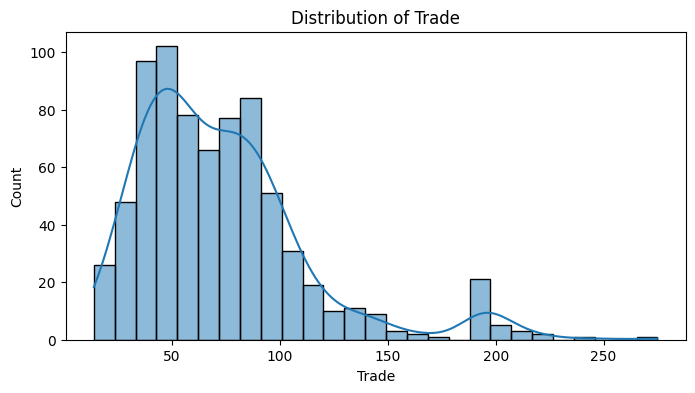

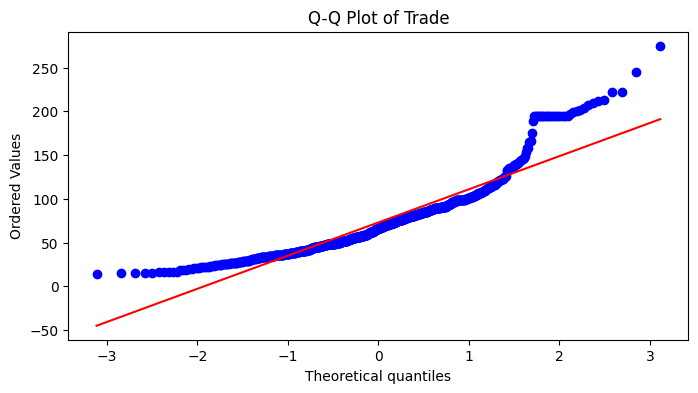

Skewness: 1.5521


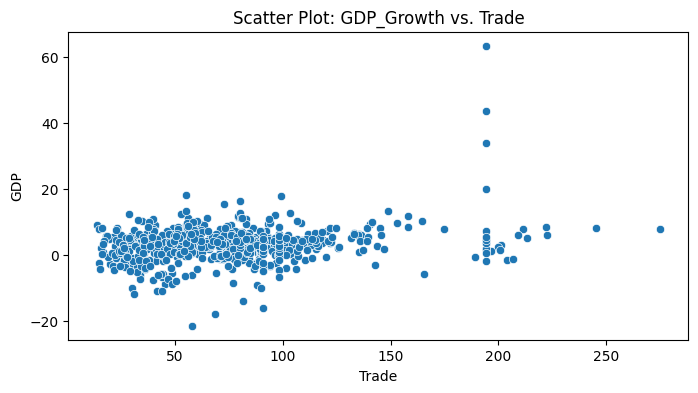

------------------------------
Checking Unemployment:


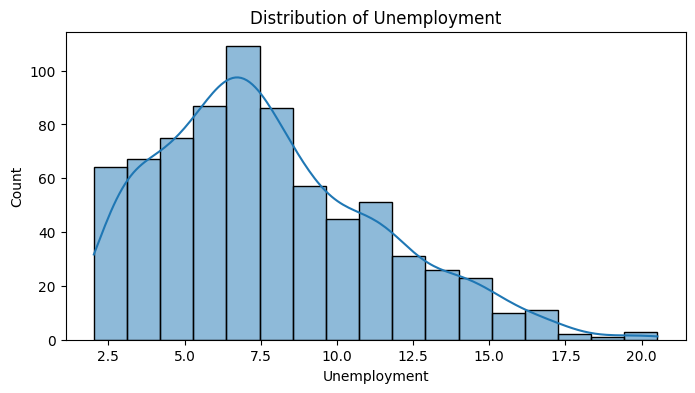

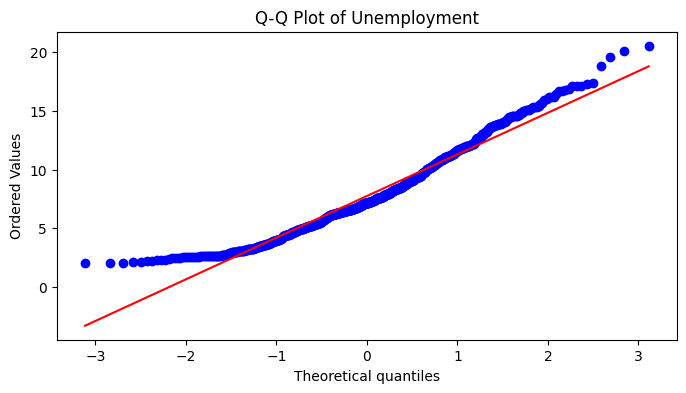

Skewness: 0.6792


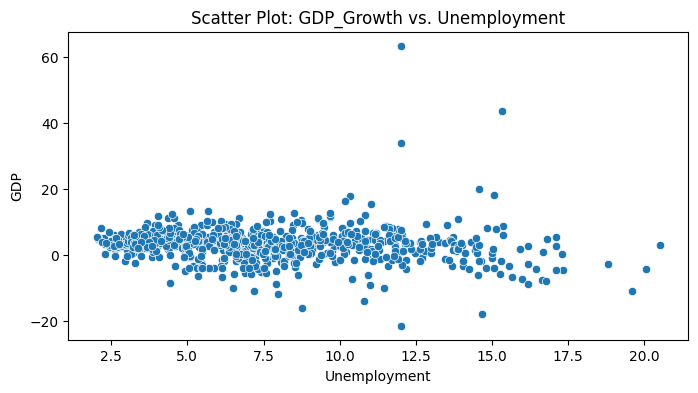

------------------------------
Checking Wages:


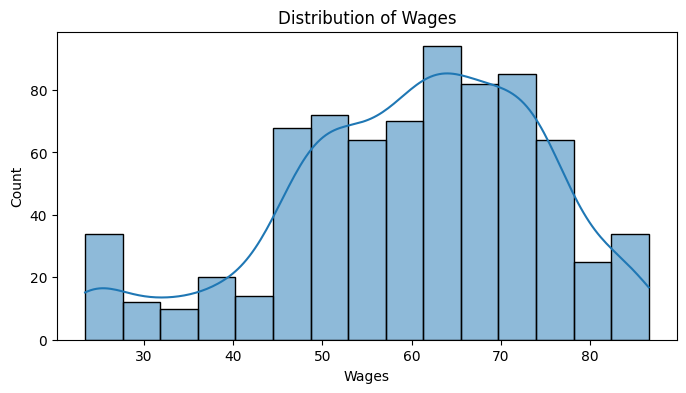

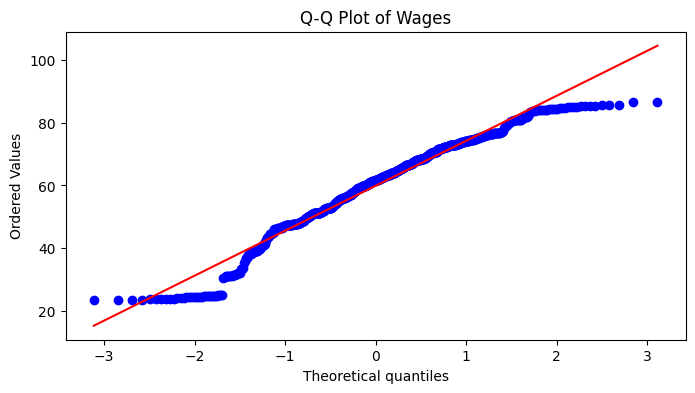

Skewness: -0.5692


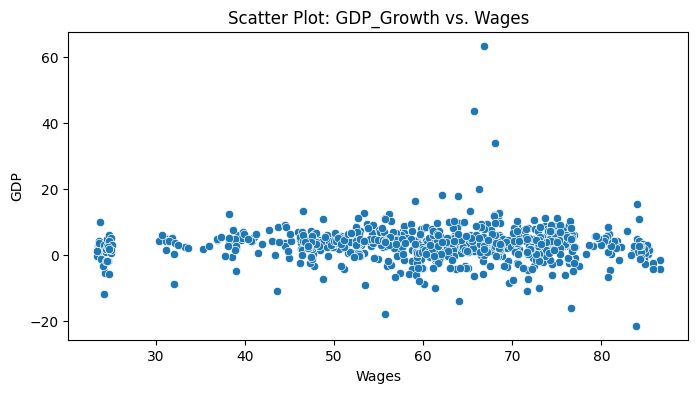

------------------------------
Checking Interest_rate:


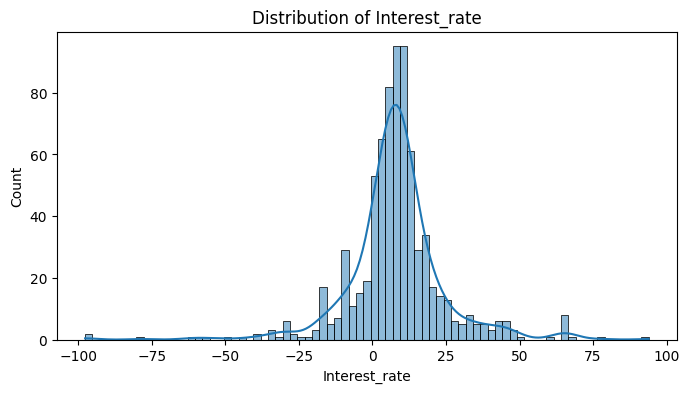

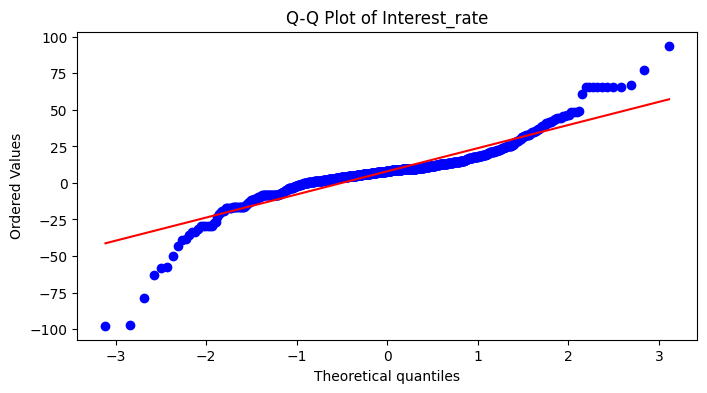

Skewness: -0.3818


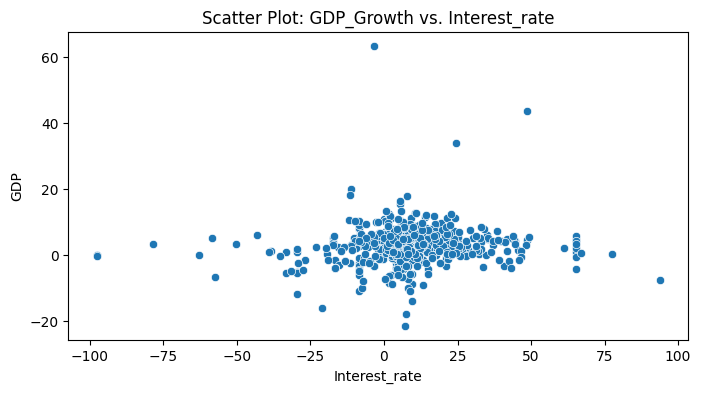

------------------------------
Checking FDI:


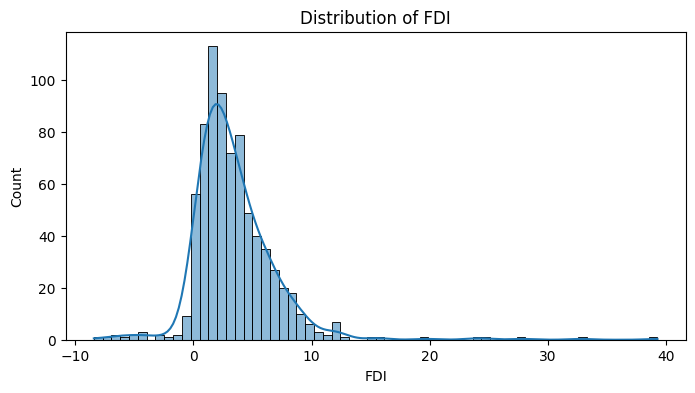

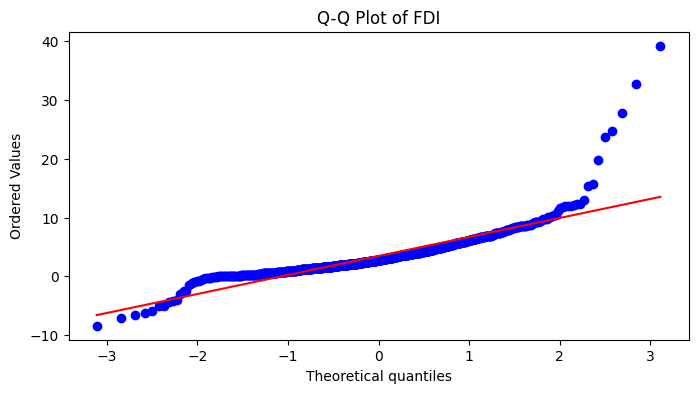

Skewness: 3.1101


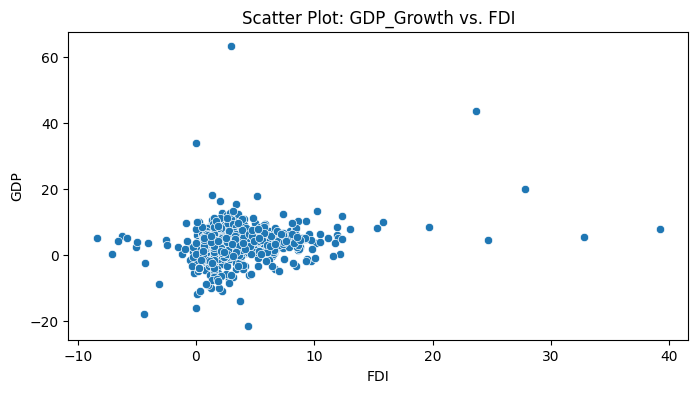

------------------------------
Checking Inflation:


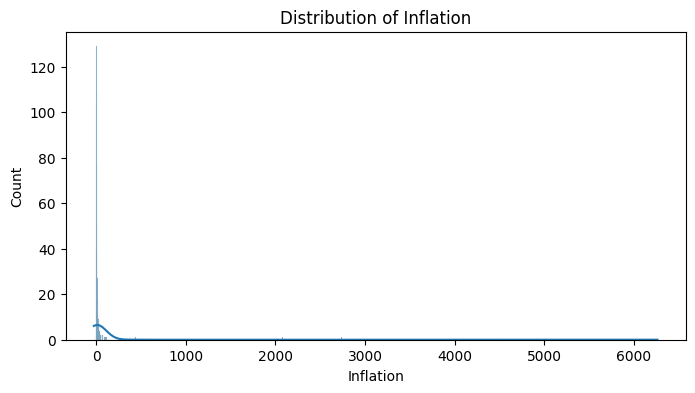

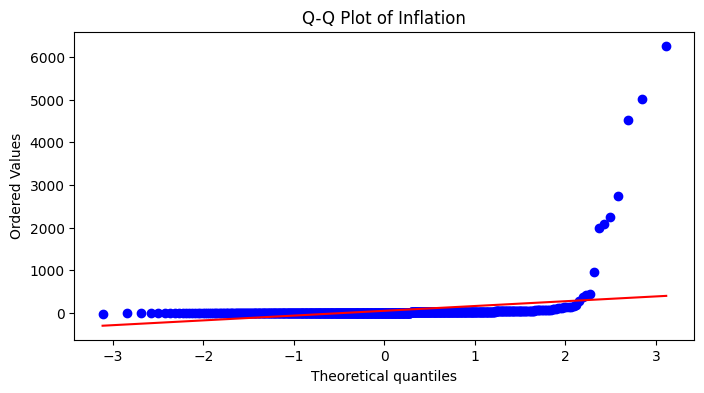

Skewness: 12.5333


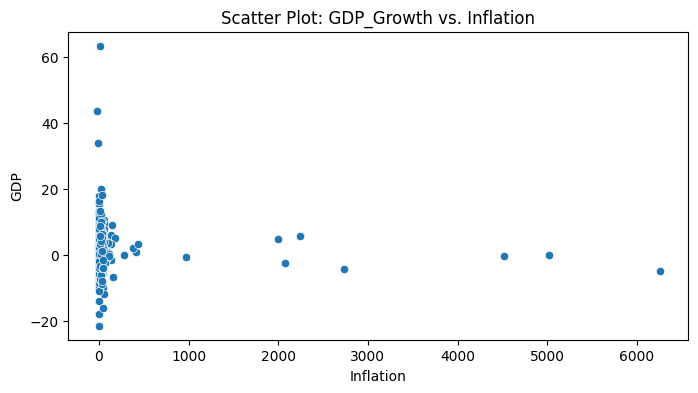

------------------------------
Checking Population:


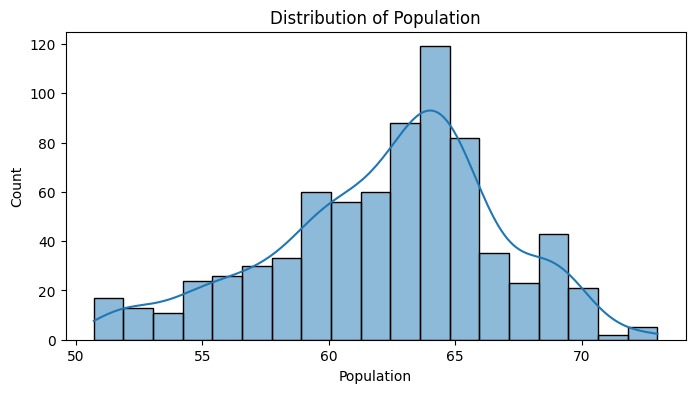

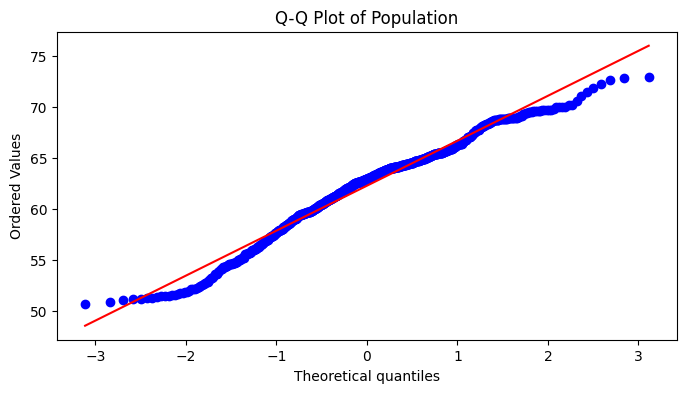

Skewness: -0.4396


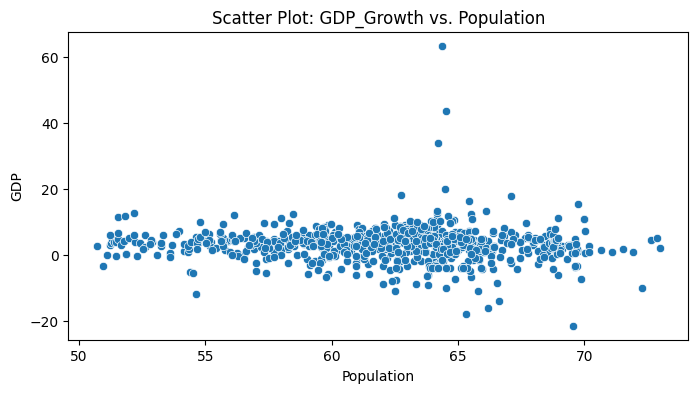

------------------------------
Checking Education:


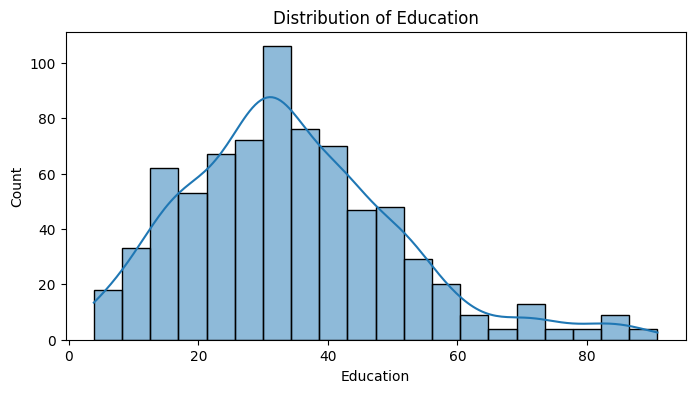

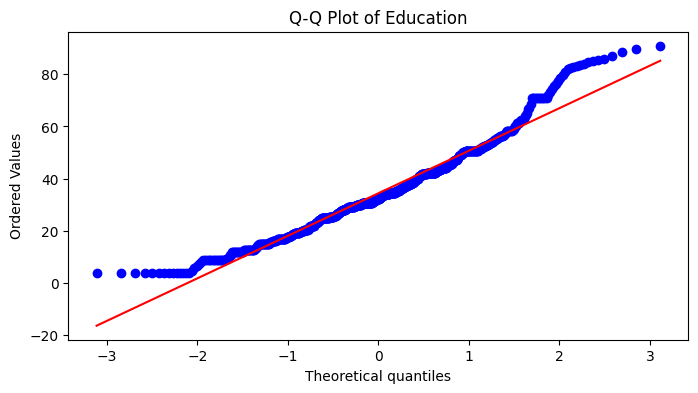

Skewness: 0.7203


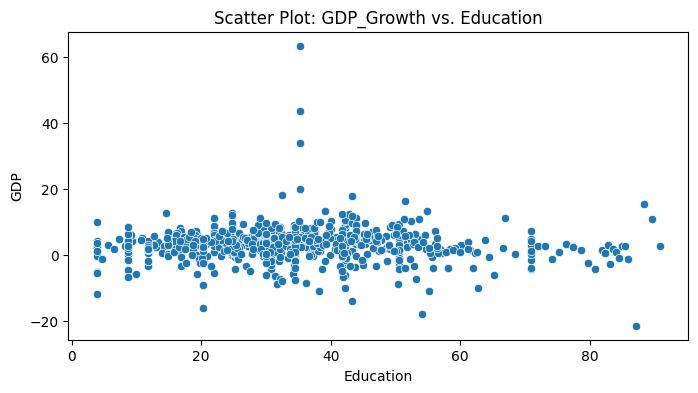

------------------------------


In [45]:
from scipy import stats

variables_to_check = [
    'GDP',  # Dependent
    'Trade', 'Unemployment',  # Independent
    'Wages', 'Interest_rate', 'FDI', 'Inflation', 'Population', 'Education'  # Control
]

for variable in variables_to_check:
    print(f"Checking {variable}:")

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reset[variable], kde=True)
    plt.title(f"Distribution of {variable}")
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(8, 4))
    stats.probplot(df_reset[variable].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {variable}")
    plt.show()

    # Skewness Statistic
    skewness = stats.skew(df_reset[variable].dropna())
    print(f"Skewness: {skewness:.4f}")

    # Scatter Plot (example: GDP vs. Trade)
    if variable != 'GDP' :
      plt.figure(figsize=(8, 4))
      sns.scatterplot(x=df_reset[variable], y=df_reset['GDP'])
      plt.title(f"Scatter Plot: GDP_Growth vs. {variable}")
      plt.show()

    print("-" * 30)

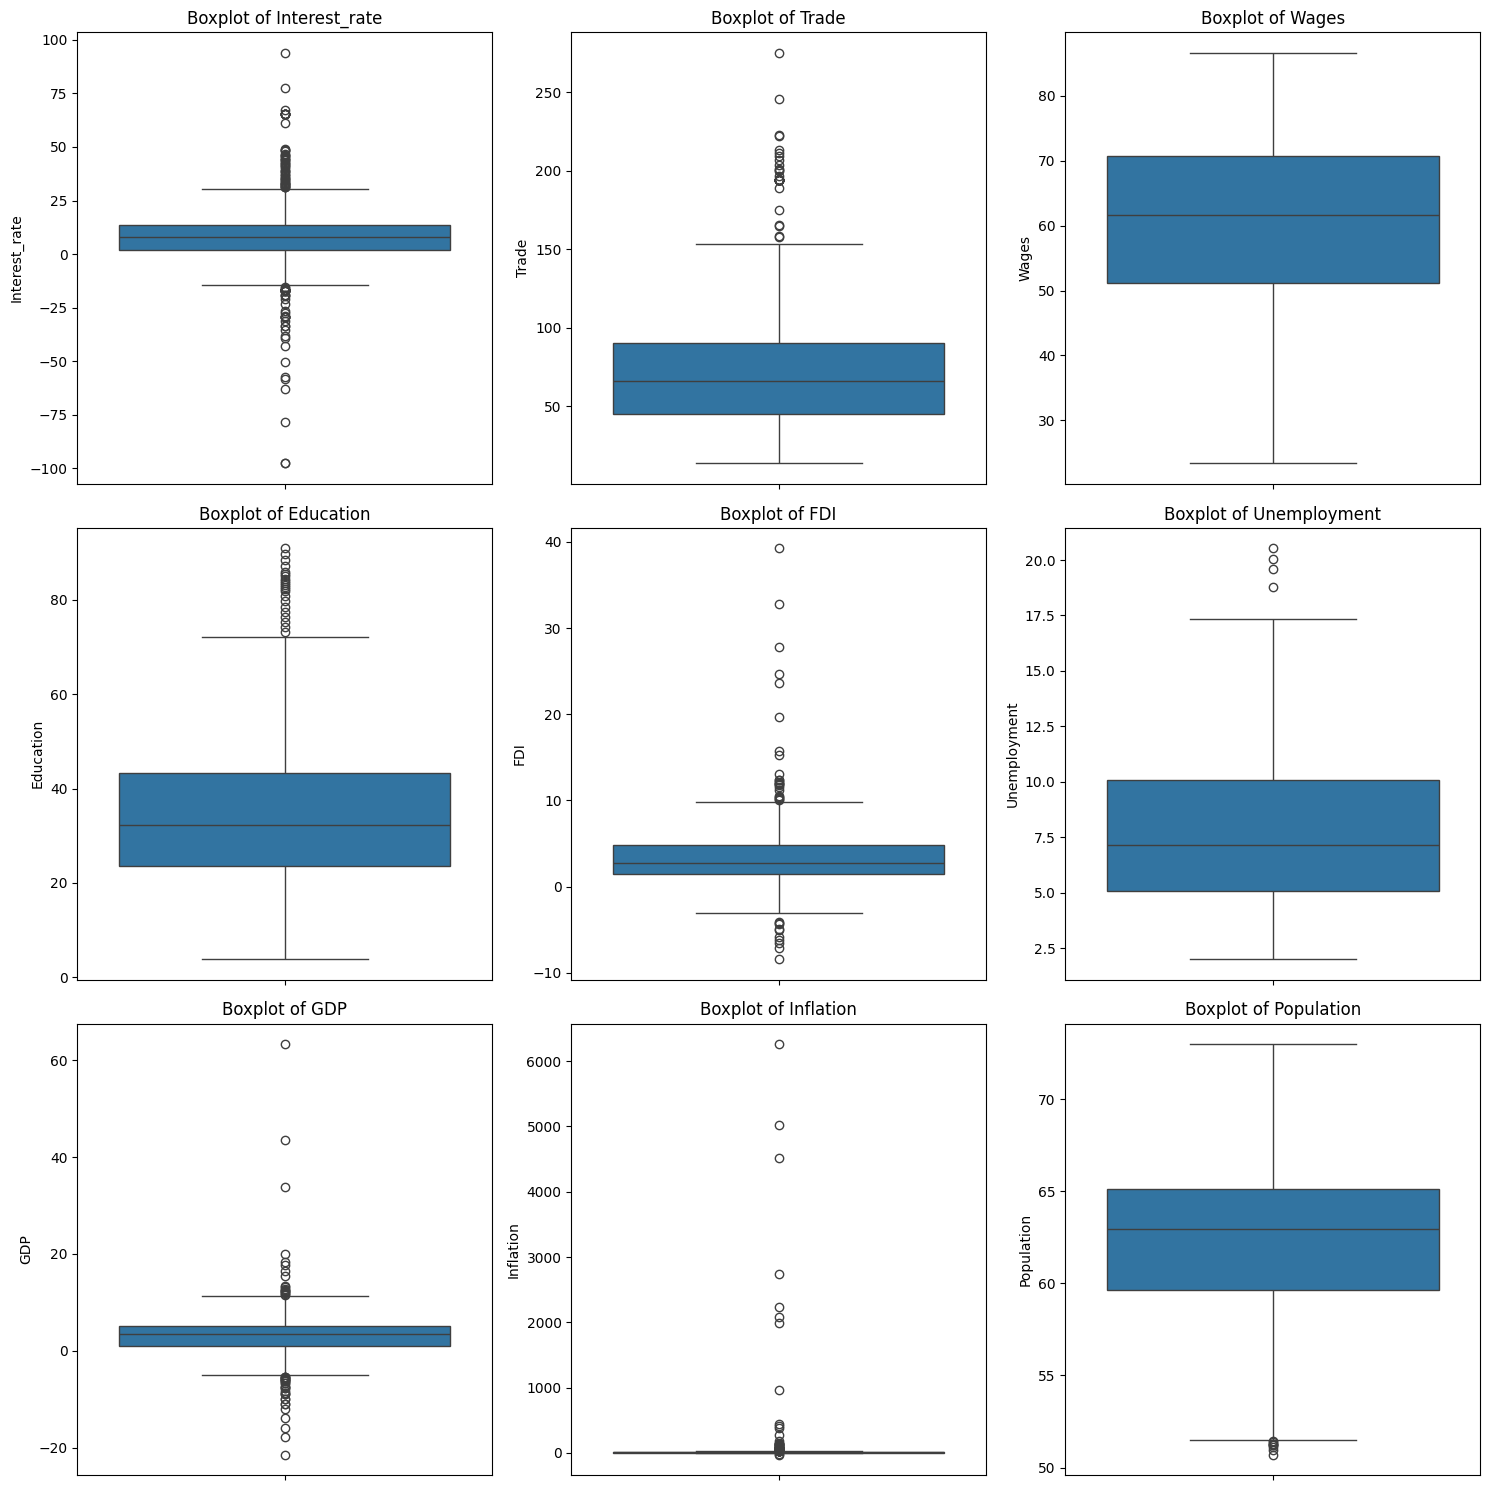

In [46]:
#Checking data distribution boxplots in a grid form
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Get numeric columns
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Create enough rows (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Create subplots
axes = axes.flatten()  # Flatten axes array for easy iteration
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Detect outliers for all variables

In [47]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Outliers

# Detect outliers for a specific column (e.g., GDP Growth)
outliers_GDP = detect_outliers_iqr(df, "GDP")
print(outliers_GDP)

                         Interest_rate       Trade      Wages  Education  \
Country            Year                                                    
Argentina          2002      -8.566029   41.752724  71.663490  38.225000   
                   2009      -8.566029   34.057127  75.956513  42.160000   
                   2020      -7.635174   30.203699  73.000020  42.160000   
Bahamas, The       2020       7.071113   57.930248  83.902436  87.121510   
                   2021       5.379497   72.951561  84.003042  88.382378   
Belize             1990      14.075794   79.411496  68.444800  24.830000   
                   1991      17.017441   79.132474  68.444800  24.830000   
                   1992      10.518489   80.287253  68.544999  24.830000   
                   2000      14.353408   96.540522  67.912740  24.830000   
                   2020       9.447766   81.821964  64.046639  43.290001   
                   2021       7.758626   99.316271  63.936836  43.290001   
Bolivia     

In [48]:
outliers_Ir = detect_outliers_iqr(df, "Interest_rate")
print(outliers_Ir)

                    Interest_rate      Trade      Wages  Education       FDI  \
Country       Year                                                             
Argentina     2023     -16.771423  26.640512  74.246708  42.160000  3.694019   
Bahamas, The  1997     -38.376536  79.734886  83.713546  70.940002  3.316299   
Bolivia       1993      44.407630  47.467126  31.171155  28.222500  2.158788   
              1994      44.113156  48.860851  31.214259  28.435000  2.176812   
              1995      35.530094  49.737987  31.325781  28.647500  5.847960   
...                           ...        ...        ...        ...       ...   
Venezuela, RB 2019     -16.539976  48.090814  61.085398  58.067825  0.235302   
              2020     -16.539976  48.090814  59.981937  58.067825  0.235302   
              2021     -16.539976  48.090814  59.927362  58.067825  0.235302   
              2022     -16.539976  48.090814  59.890292  58.067825  0.235302   
              2023     -16.539976  48.09

In [49]:
outliers_tr = detect_outliers_iqr(df, "Trade")
print(outliers_tr)

              Interest_rate       Trade      Wages  Education        FDI  \
Country Year                                                               
Guyana  1991     -43.058181  222.609090  59.703361  30.829500   0.101706   
        1992      15.621420  274.973116  59.808061  30.829500  39.245327   
        1993       2.062072  245.369439  60.056434  30.829500  15.313761   
        1994       1.534185  222.067843  60.370756  30.829500  19.725447   
        1995       6.113206  213.327170  60.670625  30.829500  11.971814   
        1996      13.338474  211.337532  60.974660  30.829500   8.363978   
        1997      15.378956  209.136672  61.231342  30.829500   6.941311   
        1998      13.399432  203.842431  61.385429  30.829500   6.132142   
        1999       5.303300  201.059315  61.555941  30.829500   6.621039   
        2000      10.053495  206.767370  61.487775  30.829500   9.415325   
        2001      16.631978  199.577001  61.694058  30.829500   7.863319   
        2002

In [50]:
outliers_edu = detect_outliers_iqr(df, "Education")
print(outliers_edu)

                   Interest_rate      Trade      Wages  Education       FDI  \
Country      Year                                                             
Bahamas, The 2002       1.961828  70.277982  83.691027  73.128001  1.720383   
             2003       4.789804  71.063541  84.762901  74.222001  2.144285   
             2004       4.748261  76.001983  84.086445  75.316000  3.021438   
             2005       0.462285  81.396271  84.621508  76.410000  5.727971   
             2006       4.633432  87.550714  85.251124  77.503999  6.947601   
             2007       2.478955  88.012816  85.360112  78.597999  6.718093   
             2008       3.952551  87.429223  85.792509  79.691998  8.171729   
             2009       6.604831  76.521044  85.784160  80.785998  6.651599   
             2010       5.915789  78.675602  85.400568  81.879997  8.636992   
             2011       5.972385  88.333689  84.946611  82.322291  6.619575   
             2012       1.349195  84.251241  85.1147

In [51]:
outliers_fdi = detect_outliers_iqr(df, "FDI")
print(outliers_fdi)

                Interest_rate       Trade      Wages  Education        FDI  \
Country   Year                                                               
Belize    2012      11.612928  111.631926  68.007289  37.591166  10.170808   
Bolivia   1998      30.229051   52.281163  31.853707  29.284999  11.171528   
          1999      32.181522   44.168256  32.119239  29.497499  12.196646   
Chile     1999      10.211970   54.695610  73.706394  43.889999  11.591914   
          2008      12.910470   80.676626  76.174452  51.860001  10.457111   
          2011       5.587458   72.481643  74.852876  53.099998  10.489774   
          2012       9.223378   68.156143  76.009843  54.633778  11.909745   
Guatemala 2000      13.153175   49.145588  50.135527  12.700000  -4.088356   
          2001      26.027845   70.669033  49.230293  12.990000  -5.088200   
          2002       9.763381   67.104812  48.325042  13.280000  -4.974499   
Guyana    1992      15.621420  274.973116  59.808061  30.829500 

In [52]:
outliers_unemp = detect_outliers_iqr(df, "Unemployment")
print(outliers_unemp)

                Interest_rate      Trade      Wages  Education       FDI  \
Country   Year                                                             
Argentina 1995      -8.566029  19.771423  70.644117  34.290001  2.173928   
          2002      -8.566029  41.752724  71.663490  38.225000  2.198958   
Colombia  1999      14.919571  36.149279  51.130899  30.753334  1.747712   
          2000     -11.137956  32.667085  50.854862  31.265556  2.439507   

                Unemployment        GDP  Inflation  Population  
Country   Year                                                  
Argentina 1995         18.80  -2.845210   3.165123   61.425356  
          2002         19.59 -10.894485  30.555204   62.496087  
Colombia  1999         20.06  -4.204015  12.622941   62.662717  
          2000         20.52   2.924861  33.675371   62.967001  


In [53]:
outliers_inf = detect_outliers_iqr(df, "Inflation")
print(outliers_inf)

                    Interest_rate      Trade      Wages  Education       FDI  \
Country       Year                                                             
Argentina     1990      -8.566029  14.990859  70.516137  34.290001  1.298879   
              1991      -8.566029  13.753054  70.516137  34.290001  1.285579   
              2002      -8.566029  41.752724  71.663490  38.225000  2.198958   
              2014     -11.600699  28.406794  76.346522  42.160000  0.962407   
              2016      -7.006040  26.093888  75.216346  42.160000  0.584749   
...                           ...        ...        ...        ...       ...   
Venezuela, RB 2019     -16.539976  48.090814  61.085398  58.067825  0.235302   
              2020     -16.539976  48.090814  59.981937  58.067825  0.235302   
              2021     -16.539976  48.090814  59.927362  58.067825  0.235302   
              2022     -16.539976  48.090814  59.890292  58.067825  0.235302   
              2023     -16.539976  48.09

In [54]:
outliers_pop = detect_outliers_iqr(df, "Population")
print(outliers_pop)

                Interest_rate      Trade      Wages  Education       FDI  \
Country   Year                                                             
Guatemala 1990       9.588413  45.869485  51.397342      12.70  0.623513   
          1991       9.588413  39.520256  51.397342      12.70  0.964264   
          1992       9.588413  45.362249  51.357741      12.70  0.901274   
          1993       9.588413  43.778928  51.301622      12.70  1.249998   
          1994       9.588413  42.370893  51.251080      12.70  0.502186   
Honduras  1990      -6.366508  71.008068  47.770978      16.83  0.883606   
          1991      -3.491086  74.646734  47.770978      16.83  1.120751   
          1992      17.370922  76.256250  47.709919      16.83  0.962842   
Nicaragua 1990     -97.693477  71.290814  52.936769      14.95  0.836680   

                Unemployment       GDP    Inflation  Population  
Country   Year                                                   
Guatemala 1990         2.684  3

In [55]:
for col in ['GDP', 'Inflation', 'Population', 'Interest_rate', 'Trade', 'Education', 'FDI', 'Unemployment']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

Number of outliers in GDP: 47
Number of outliers in Inflation: 94
Number of outliers in Population: 9
Number of outliers in Interest_rate: 97
Number of outliers in Trade: 38
Number of outliers in Education: 22
Number of outliers in FDI: 33
Number of outliers in Unemployment: 4


In [56]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [57]:
for col in ['GDP', 'Inflation', 'Population', 'Interest_rate', 'Trade', 'Education', 'FDI', 'Unemployment']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

Number of outliers in GDP: 47
Number of outliers in Inflation: 94
Number of outliers in Population: 9
Number of outliers in Interest_rate: 97
Number of outliers in Trade: 38
Number of outliers in Education: 22
Number of outliers in FDI: 33
Number of outliers in Unemployment: 4


## Check skewness for each variable before handling outliers

In [58]:
print("Initial Skewness:")
print(df[['GDP', 'Inflation', 'Population', 'Interest_rate', 'Trade', 'Education', 'FDI', 'Unemployment']].skew())

Initial Skewness:
GDP               2.527482
Inflation        12.558466
Population       -0.440482
Interest_rate    -0.382570
Trade             1.555255
Education         0.721773
FDI               3.116328
Unemployment      0.680543
dtype: float64


In [59]:
from scipy.stats.mstats import winsorize

In [60]:
for col in df.columns:
    min_val = df[col].min()
    print(f"Minimum value in {col}: {min_val}")

Minimum value in Interest_rate: -97.69347711550601
Minimum value in Trade: 13.75305415888915
Minimum value in Wages: 23.3796049393725
Minimum value in Education: 3.84999990463257
Minimum value in FDI: -8.40083736509118
Minimum value in Unemployment: 2.021
Minimum value in GDP: -21.42346306584875
Minimum value in Inflation: -26.29609907454234
Minimum value in Population: 50.7007245073174


In [61]:
df_new = df.copy()

# GDP because of minimum negative value
min_gdp = df_new['GDP'].min()
if min_gdp < 0:  # Add constant if there are negative values
    df_new['GDP'] = df_new['GDP'] + abs(min_gdp) + 1
df_new['GDP'] = winsorize(df_new['GDP'], limits=[0.05, 0.05])
df_new['GDP'] = np.log1p(df_new['GDP'])

# Inflation because of minimum negative value
min_inflation = df_new['Inflation'].min()
if min_inflation < 0:  # Add constant if there are negative values
    df_new['Inflation'] = df_new['Inflation'] + abs(min_inflation) + 1
df_new['Inflation'] = winsorize(df_new['Inflation'], limits=[0.05, 0.05])
df_new['Inflation'] = np.log1p(df_new['Inflation'])

# FDI because of minimum negative value
min_fdi = df_new['FDI'].min()
if min_fdi < 0:  # Add constant if there are negative values
    df_new['FDI'] = df_new['FDI'] + abs(min_fdi) + 1
df_new['FDI'] = winsorize(df_new['FDI'], limits=[0.05, 0.05])
df_new['FDI'] = np.log1p(df_new['FDI'])

# Population
df_new['Population'] = winsorize(df_new['Population'], limits=[0.05, 0.05])

# Interest_rate
df_new['Interest_rate'] = winsorize(df_new['Interest_rate'], limits=[0.05, 0.05])

# Trade
df_new['Trade'] = winsorize(df_new['Trade'], limits=[0.05, 0.05])
df_new['Trade'] = np.log1p(df_new['Trade'])

# Education
df_new['Education'] = winsorize(df_new['Education'], limits=[0.05, 0.05])
df_new['Education'] = np.log1p(df_new['Education'])

# Unemployment
df_new['Unemployment'] = winsorize(df_new['Unemployment'], limits=[0.05, 0.05])
df_new['Unemployment'] = np.log1p(df_new['Unemployment'])


In [62]:
print("Initial Skewness:")
print(df_new[['GDP', 'Inflation', 'Population', 'Interest_rate', 'Trade', 'Education', 'FDI', 'Unemployment']].skew())

Initial Skewness:
GDP             -0.647196
Inflation        1.342471
Population      -0.383097
Interest_rate    0.203038
Trade           -0.038758
Education       -0.505715
FDI              0.415209
Unemployment    -0.233274
dtype: float64


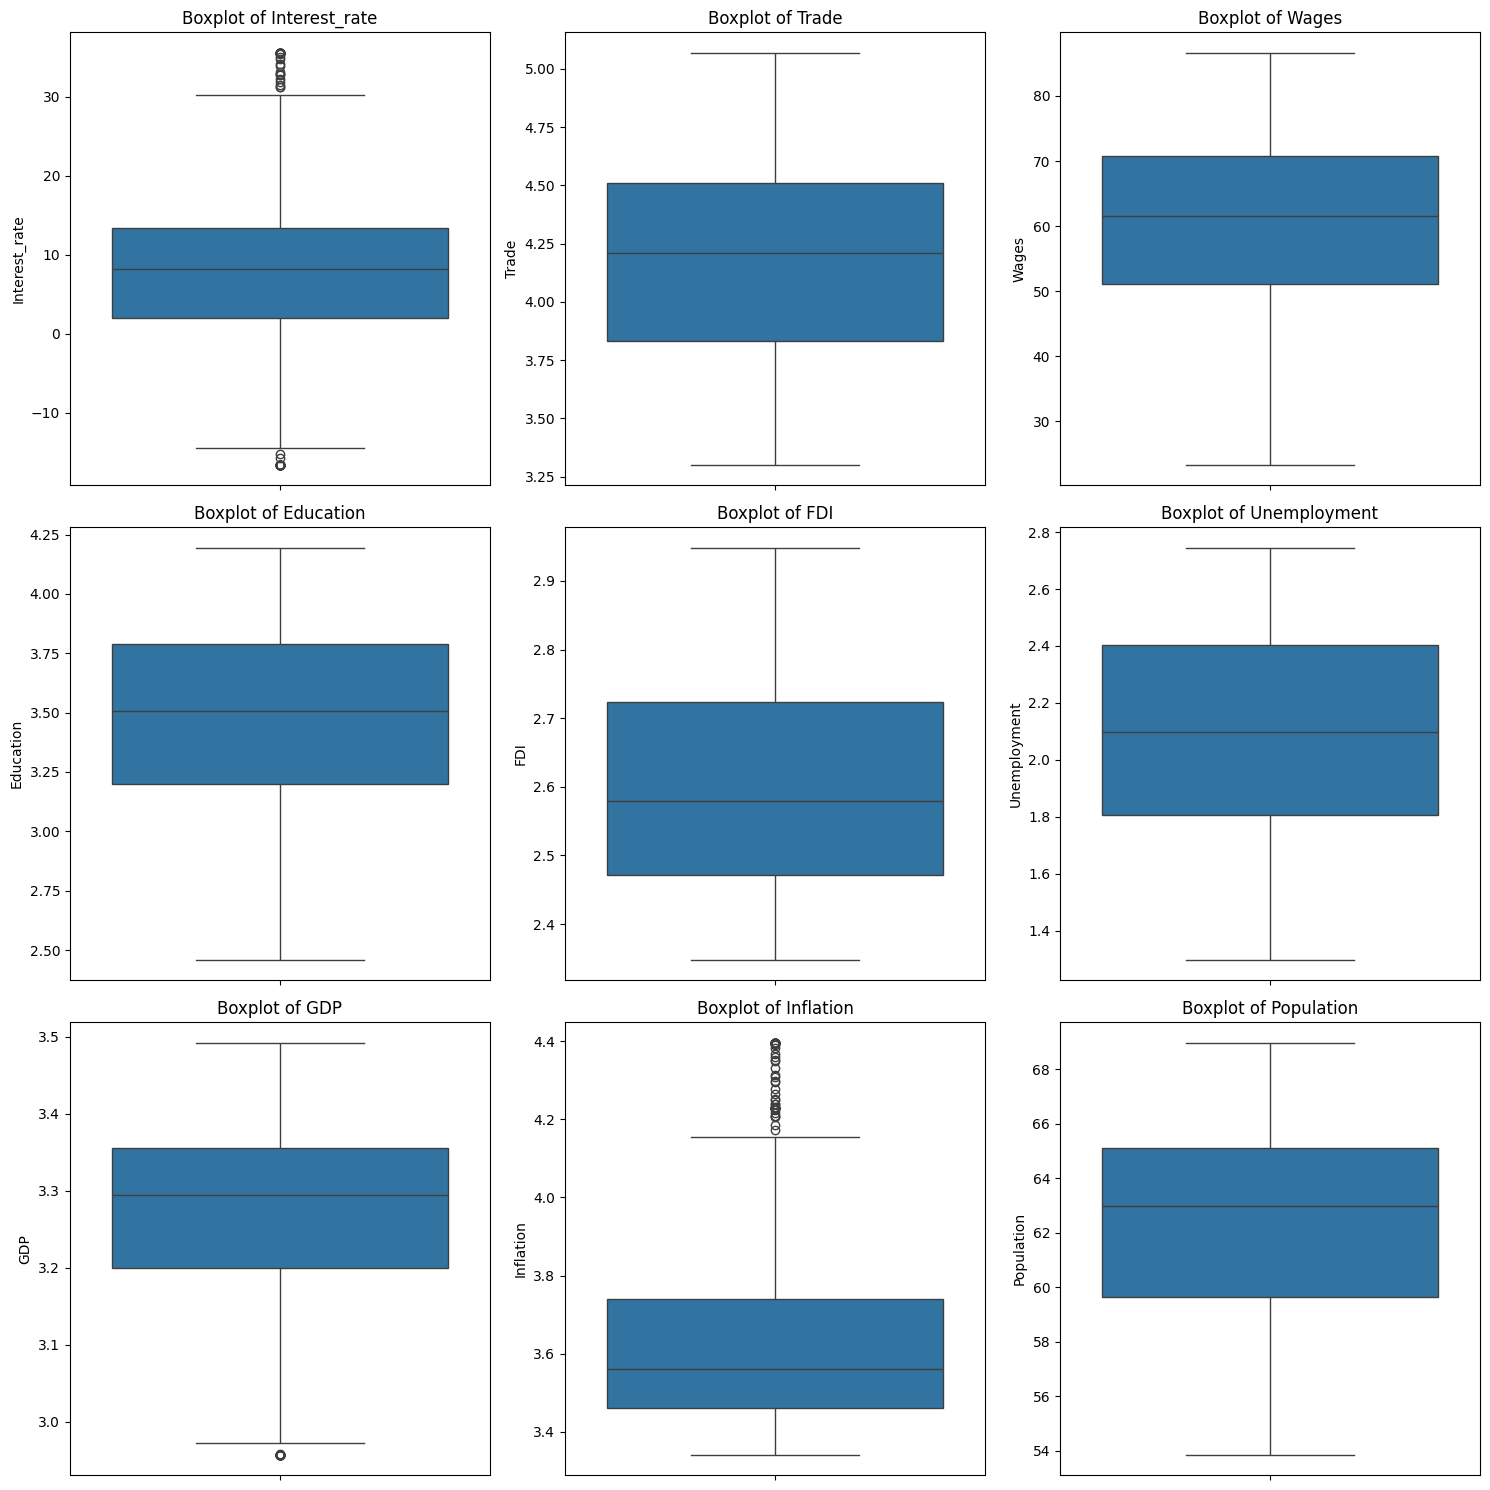

In [63]:
#Checking data distribution boxplots in a grid form
num_cols = df_new.select_dtypes(include=['float64', 'int64']).columns  # Get numeric columns
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Create enough rows (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Create subplots
axes = axes.flatten()  # Flatten axes array for easy iteration
for i, col in enumerate(num_cols):
    sns.boxplot(y=df_new[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Checking GDP:


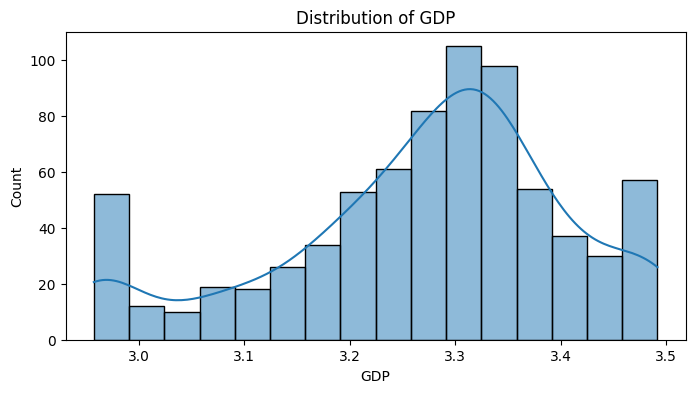

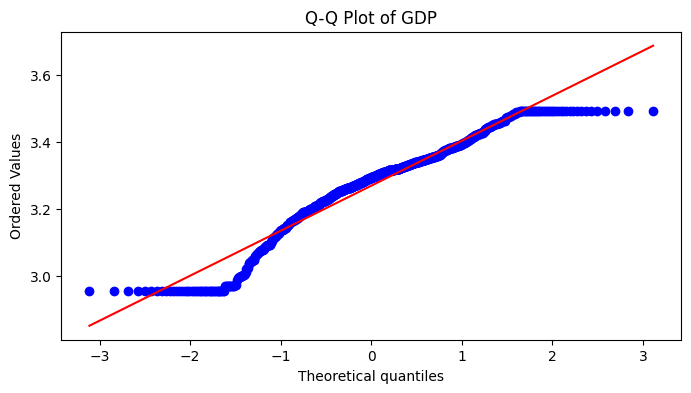

Skewness: -0.6459
------------------------------
Checking Trade:


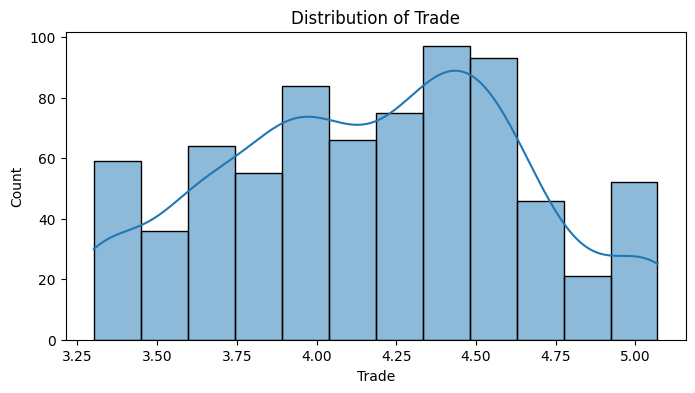

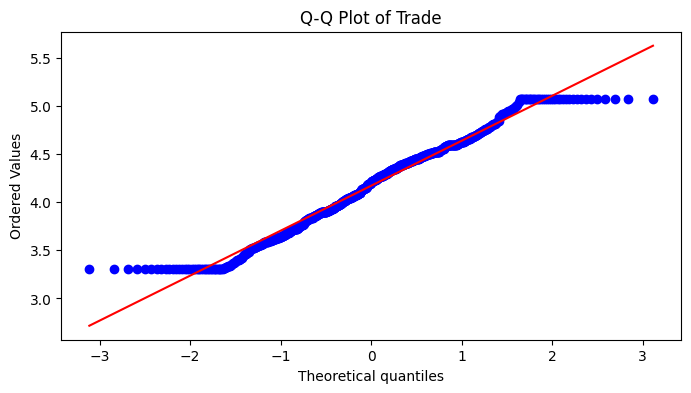

Skewness: -0.0387


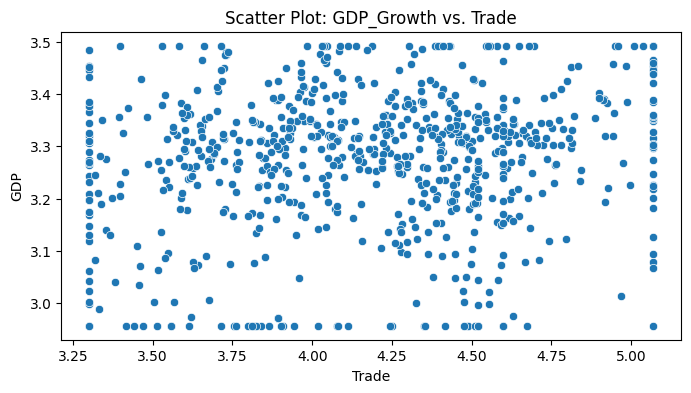

------------------------------
Checking Unemployment:


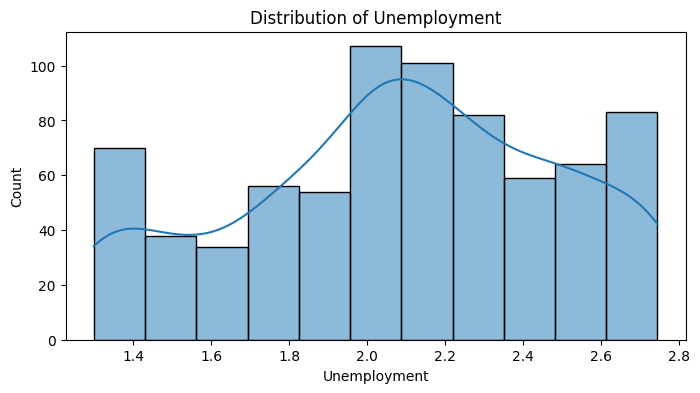

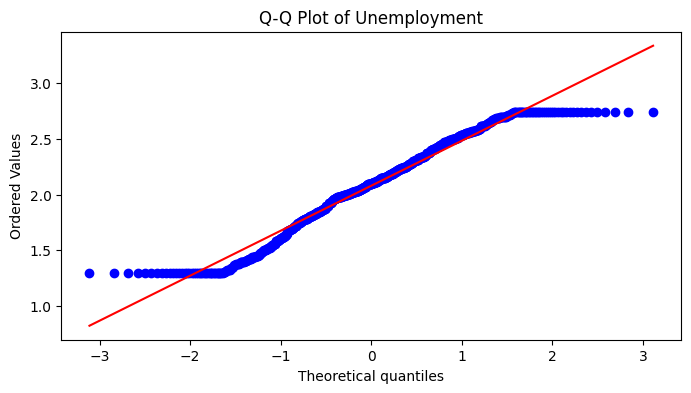

Skewness: -0.2328


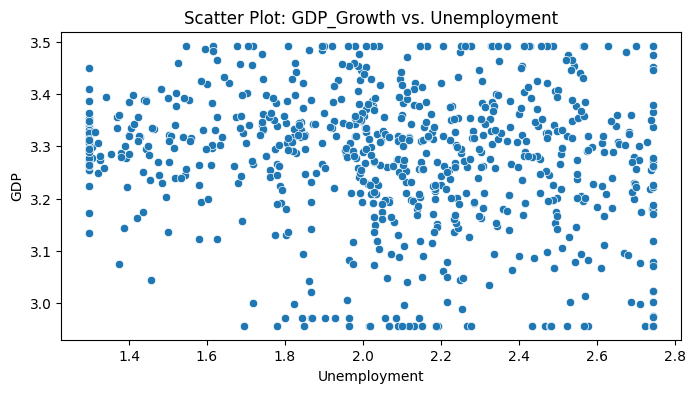

------------------------------
Checking Wages:


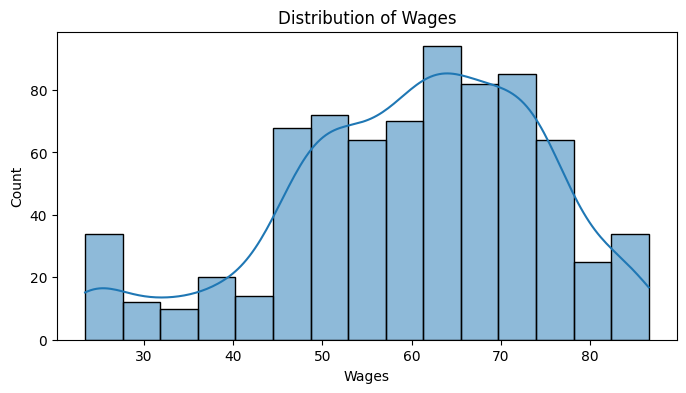

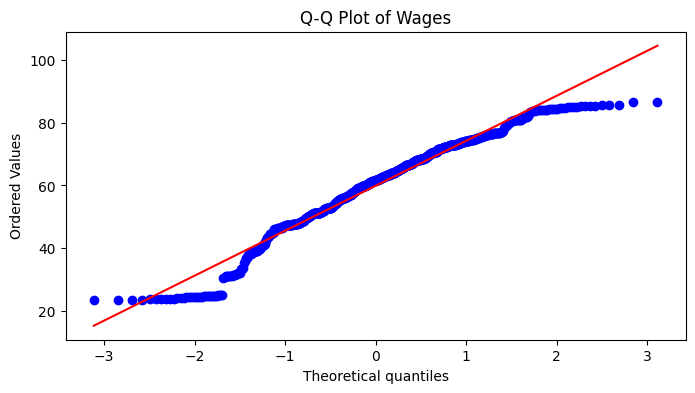

Skewness: -0.5692


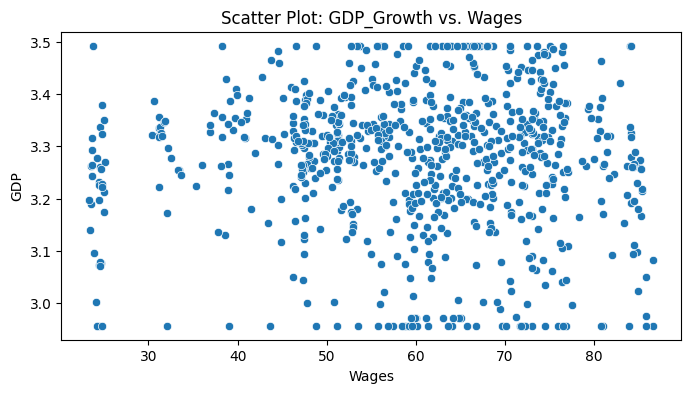

------------------------------
Checking Interest_rate:


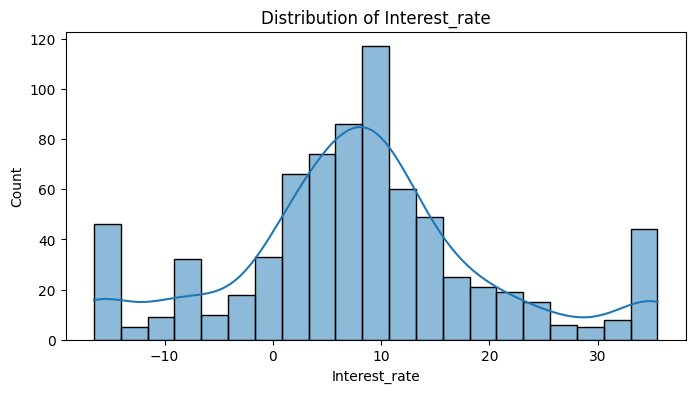

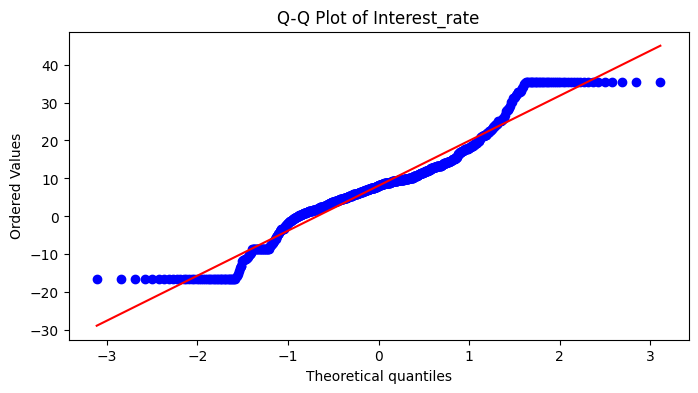

Skewness: 0.2026


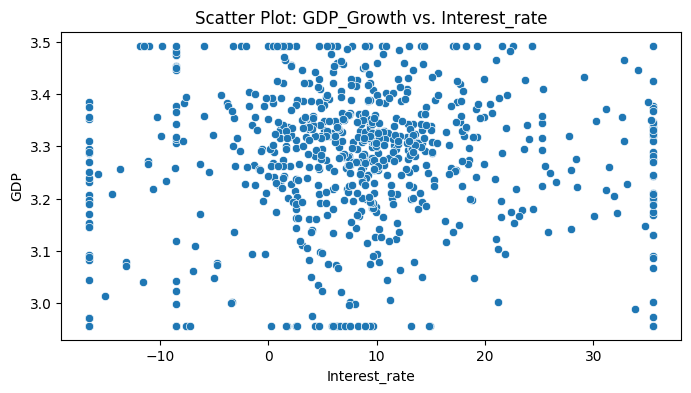

------------------------------
Checking FDI:


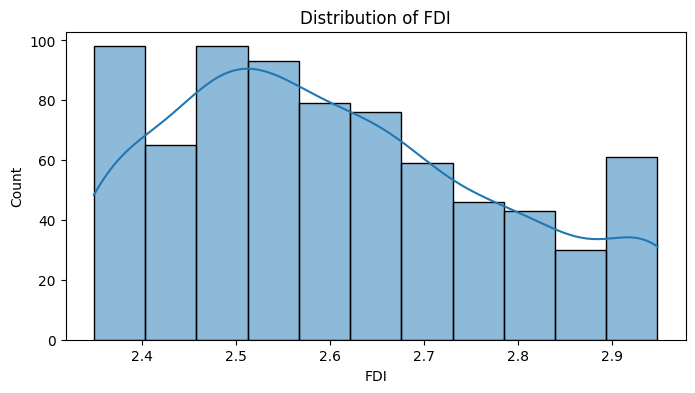

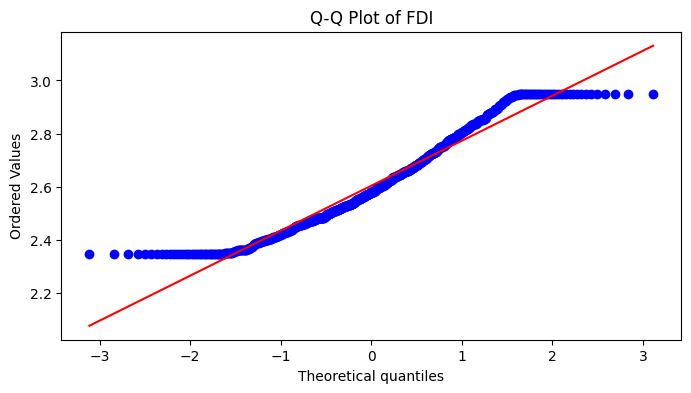

Skewness: 0.4144


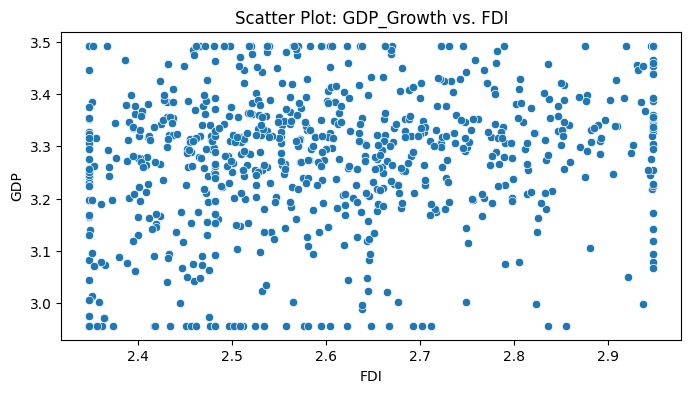

------------------------------
Checking Inflation:


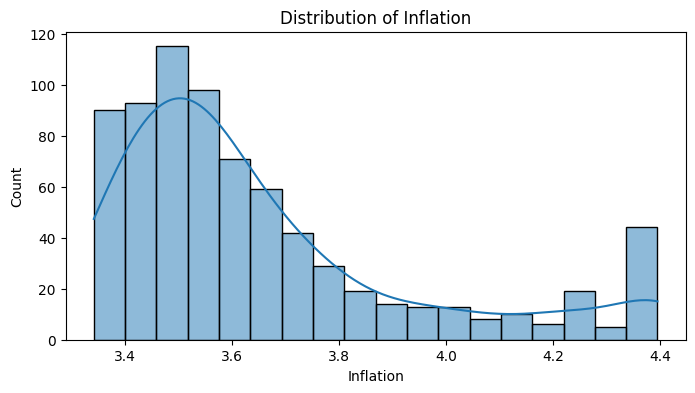

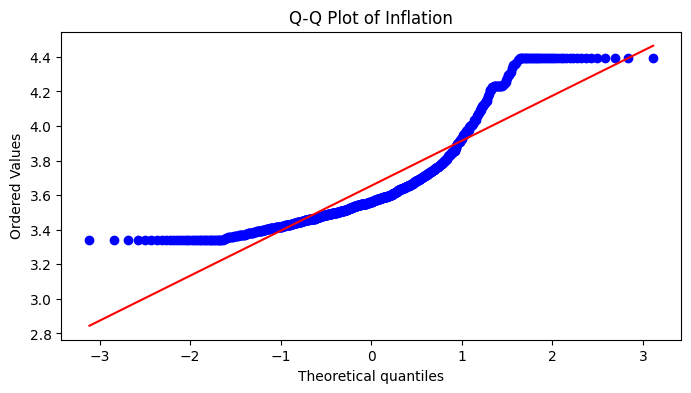

Skewness: 1.3398


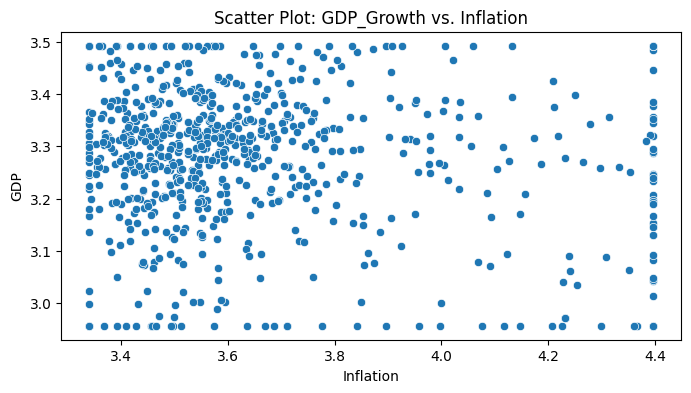

------------------------------
Checking Population:


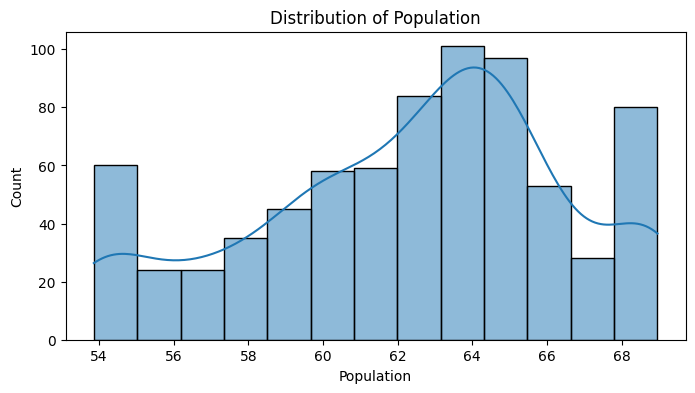

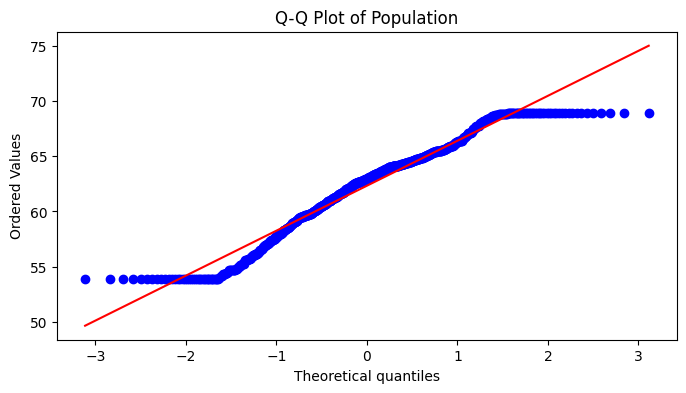

Skewness: -0.3823


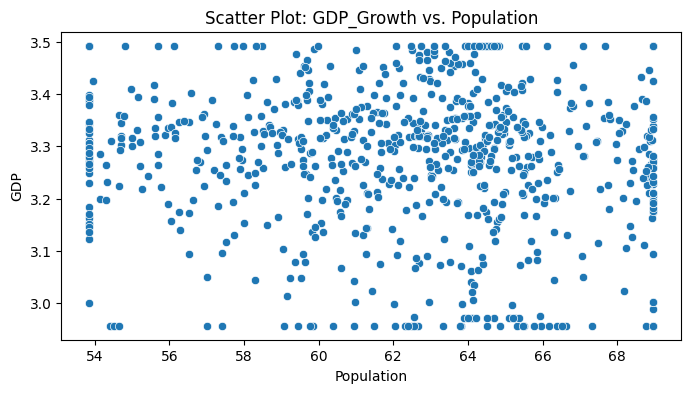

------------------------------
Checking Education:


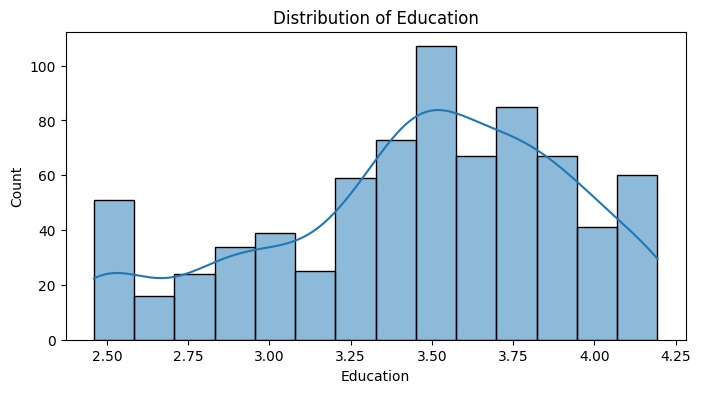

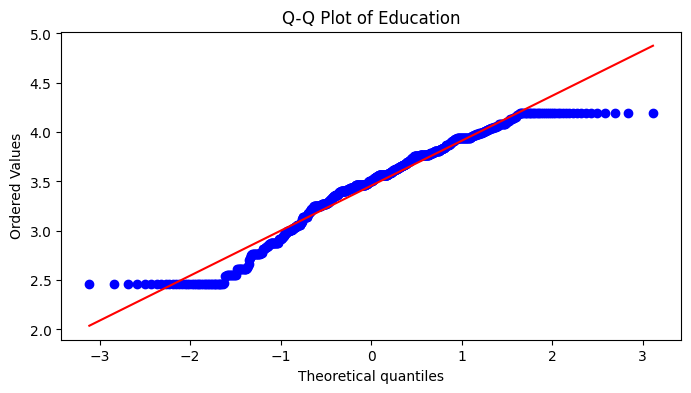

Skewness: -0.5047


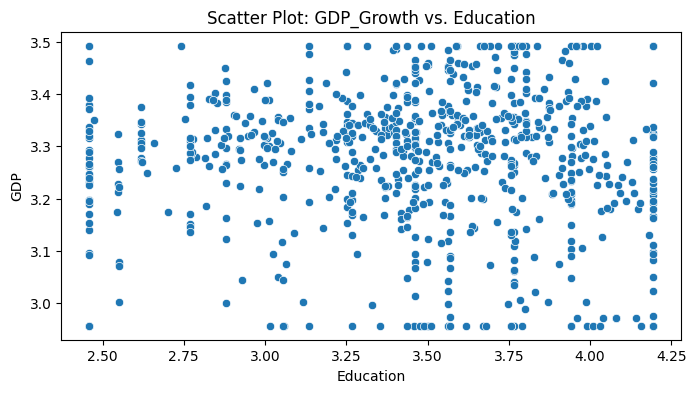

------------------------------


In [64]:
from scipy import stats

variables_to_check = [
    'GDP',  # Dependent
    'Trade', 'Unemployment',  # Independent
    'Wages', 'Interest_rate', 'FDI', 'Inflation', 'Population', 'Education'  # Control
]

for variable in variables_to_check:
    print(f"Checking {variable}:")

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df_new[variable], kde=True)
    plt.title(f"Distribution of {variable}")
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(8, 4))
    stats.probplot(df_new[variable].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {variable}")
    plt.show()

    # Skewness Statistic
    skewness = stats.skew(df_new[variable].dropna())
    print(f"Skewness: {skewness:.4f}")

    # Scatter Plot (example: GDP vs. Trade)
    if variable != 'GDP' :
      plt.figure(figsize=(8, 4))
      sns.scatterplot(x=df_new[variable], y=df_new['GDP'])
      plt.title(f"Scatter Plot: GDP_Growth vs. {variable}")
      plt.show()

    print("-" * 30)

In [65]:
print(df_new.isnull().sum())

Interest_rate    0
Trade            0
Wages            0
Education        0
FDI              0
Unemployment     0
GDP              0
Inflation        0
Population       0
dtype: int64


## Checking stationarity using Dicky fuller

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
def adf_test(series, column_name):
    result = adfuller(series, autolag='AIC')  # Perform the test
    print(f"ADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Number of Lags Used: {result[2]}")  # Access and print the number of lags
    print(f"Number of Observations Used for ADF Regression: {result[3]}")
    print(f"Critical Values: {result[4]}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary", "\n")

In [68]:
adf_test(df_new['GDP'], 'GDP')
adf_test(df_new['Unemployment'], 'Unemployment')
adf_test(df_new['Trade'], 'Trade')
adf_test(df_new['Population'], 'Population')
adf_test(df_new['Interest_rate'], 'Interest_rate')
adf_test(df_new['Education'], 'Education')
adf_test(df_new['Wages'], 'Wages')
adf_test(df_new['FDI'], 'FDI')
adf_test(df_new['Inflation'], 'Inflation')

ADF Test for GDP:
ADF Statistic: -10.4707
p-value: 0.0000
Number of Lags Used: 3
Number of Observations Used for ADF Regression: 744
Critical Values: {'1%': np.float64(-3.4391698996357687), '5%': np.float64(-2.8654325580580204), '10%': np.float64(-2.568842816582842)}
Stationary 

ADF Test for Unemployment:
ADF Statistic: -5.3968
p-value: 0.0000
Number of Lags Used: 0
Number of Observations Used for ADF Regression: 747
Critical Values: {'1%': np.float64(-3.439134355513998), '5%': np.float64(-2.865416893922985), '10%': np.float64(-2.56883447171999)}
Stationary 

ADF Test for Trade:
ADF Statistic: -4.5662
p-value: 0.0001
Number of Lags Used: 0
Number of Observations Used for ADF Regression: 747
Critical Values: {'1%': np.float64(-3.439134355513998), '5%': np.float64(-2.865416893922985), '10%': np.float64(-2.56883447171999)}
Stationary 

ADF Test for Population:
ADF Statistic: -5.2748
p-value: 0.0000
Number of Lags Used: 0
Number of Observations Used for ADF Regression: 747
Critical Values

In [ ]:
# Compute correlation matrix

In [69]:
corr_matrix = df_new.corr()

In [70]:
print(corr_matrix)

               Interest_rate     Trade     Wages  Education       FDI  \
Interest_rate       1.000000 -0.113233 -0.155494   0.022316  0.101365   
Trade              -0.113233  1.000000  0.220115   0.020432  0.374323   
Wages              -0.155494  0.220115  1.000000   0.389638  0.179655   
Education           0.022316  0.020432  0.389638   1.000000  0.284736   
FDI                 0.101365  0.374323  0.179655   0.284736  1.000000   
Unemployment       -0.102579 -0.047122  0.309275   0.079769 -0.004932   
GDP                 0.135282  0.160290 -0.013501  -0.040530  0.239405   
Inflation          -0.335002 -0.241532 -0.002520  -0.207066 -0.399745   
Population         -0.066320 -0.057077  0.492664   0.679713  0.236030   

               Unemployment       GDP  Inflation  Population  
Interest_rate     -0.102579  0.135282  -0.335002   -0.066320  
Trade             -0.047122  0.160290  -0.241532   -0.057077  
Wages              0.309275 -0.013501  -0.002520    0.492664  
Education        

In [71]:
# Compute the correlation matrix
corr_matrix_pearson = df_new.corr(method='pearson')

# Display the correlation matrix
print(corr_matrix_pearson)

               Interest_rate     Trade     Wages  Education       FDI  \
Interest_rate       1.000000 -0.113233 -0.155494   0.022316  0.101365   
Trade              -0.113233  1.000000  0.220115   0.020432  0.374323   
Wages              -0.155494  0.220115  1.000000   0.389638  0.179655   
Education           0.022316  0.020432  0.389638   1.000000  0.284736   
FDI                 0.101365  0.374323  0.179655   0.284736  1.000000   
Unemployment       -0.102579 -0.047122  0.309275   0.079769 -0.004932   
GDP                 0.135282  0.160290 -0.013501  -0.040530  0.239405   
Inflation          -0.335002 -0.241532 -0.002520  -0.207066 -0.399745   
Population         -0.066320 -0.057077  0.492664   0.679713  0.236030   

               Unemployment       GDP  Inflation  Population  
Interest_rate     -0.102579  0.135282  -0.335002   -0.066320  
Trade             -0.047122  0.160290  -0.241532   -0.057077  
Wages              0.309275 -0.013501  -0.002520    0.492664  
Education        

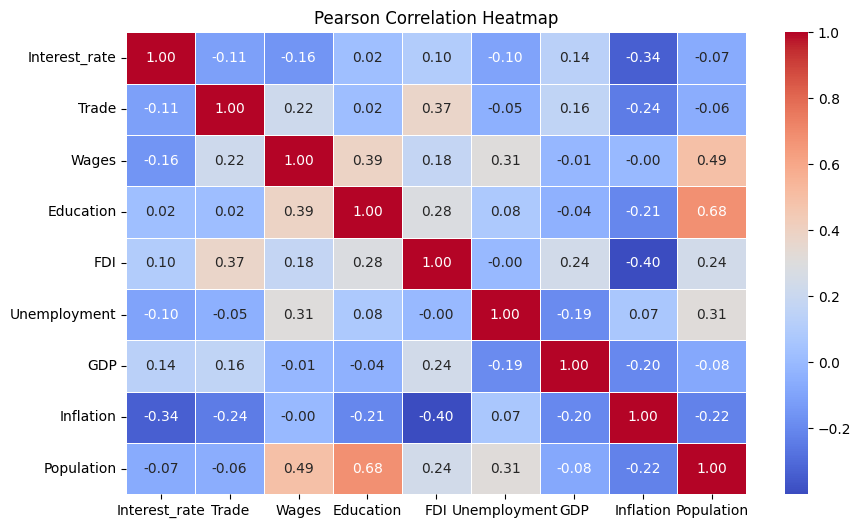

In [72]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [73]:
import statsmodels.api as sm

In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Finding VIF

In [75]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_new is your DataFrame with independent variables
X = df_new[['Interest_rate', 'FDI', 'Inflation', 'Population', 'Education', 'Wages', 'GDP', 'Unemployment', 'Trade']] 

# Add a constant term for VIF calculation
X = sm.add_constant(X)  # Use sm.add_constant for consistency

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Add 1/VIF column
vif_data["1/VIF"] = 1 / vif_data["VIF"]

print(vif_data)

         Feature          VIF     1/VIF
0          const  1883.277775  0.000531
1  Interest_rate     1.243119  0.804428
2            FDI     1.463675  0.683212
3      Inflation     1.515378  0.659901
4     Population     2.552312  0.391802
5      Education     2.029253  0.492792
6          Wages     1.588522  0.629516
7            GDP     1.142566  0.875223
8   Unemployment     1.252513  0.798395
9          Trade     1.420958  0.703750


In [76]:
df_new.to_csv('cleaned_data_stage_pre_estim1.csv', index=False)

In [77]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR

## Fit the VAR model and find optimal lag length

In [78]:
model = VAR(df_new)
lag_selection = model.select_order(maxlags=5)#Test up to 5 lags
print(lag_selection.summary())# Shows best lag based on AIC/BIC

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -3.753      -3.697     0.02345      -3.731
1      -17.73     -17.17*   1.988e-08     -17.52*
2      -17.72      -16.66   2.010e-08      -17.31
3      -17.78      -16.22   1.899e-08      -17.18
4     -17.84*      -15.78  1.780e-08*      -17.05
5      -17.77      -15.20   1.922e-08      -16.78
-------------------------------------------------


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [79]:
print(df_new.index)

MultiIndex([(    'Argentina', 1990),
            (    'Argentina', 1991),
            (    'Argentina', 1992),
            (    'Argentina', 1993),
            (    'Argentina', 1994),
            (    'Argentina', 1995),
            (    'Argentina', 1996),
            (    'Argentina', 1997),
            (    'Argentina', 1998),
            (    'Argentina', 1999),
            ...
            ('Venezuela, RB', 2014),
            ('Venezuela, RB', 2015),
            ('Venezuela, RB', 2016),
            ('Venezuela, RB', 2017),
            ('Venezuela, RB', 2018),
            ('Venezuela, RB', 2019),
            ('Venezuela, RB', 2020),
            ('Venezuela, RB', 2021),
            ('Venezuela, RB', 2022),
            ('Venezuela, RB', 2023)],
           names=['Country', 'Year'], length=748)


## Reset the entire index to make 'Country' and 'Year' regular columns

In [80]:
df_var = df_new.copy()

df_var = df_var.reset_index()

In [81]:
print(df_var.index)

RangeIndex(start=0, stop=748, step=1)


In [82]:
df_var.to_csv('cleaned_data_stage_pre_estim2.csv', index=False)